#Load Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,classification_report

from sklearn.metrics import roc_auc_score,f1_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn import tree
import graphviz

import xgboost as xgb
import lightgbm as lgb

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

#Set Seaborn Theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_style("darkgrid")
#Setting to display Pipeline
from sklearn import set_config
set_config(display="diagram")
sns.set(rc={'figure.figsize':(10,4)})

In [2]:
# Read in data into a dataframe 
data = pd.read_csv("Customer-Churn-Analysis.csv")
# Display top of dataframe
data.head()

,Customer,County,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Waterford,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Dublin,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Limerick,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,Cork,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Waterford,2813.692575,No,Basic,Bachelor,02-03-2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   County                         9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
#check for duplicates
data.duplicated().any()

False

In [5]:
data.shape

(9134, 24)

In [6]:
# Statistics for each column
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


#Missing Values

In [7]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(data)

Your selected dataframe has 24 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#Exploratory Data Analysis (EDA)

In [9]:
# round up to numerical
data['Customer Lifetime Value'] = data['Customer Lifetime Value'].apply(np.ceil)
data['Total Claim Amount'] = data['Total Claim Amount'].apply(np.ceil)


In [10]:
# datetime 
# split them into year date and month
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'])

data['Year'] = data['Effective To Date'].dt.year
data['Month'] = data['Effective To Date'].dt.month
data['Day'] = data['Effective To Date'].dt.day

In [11]:
data.drop(["Customer","Effective To Date"],axis=1,inplace=True)
#data.describe(include="object")

<Axes: xlabel='Response', ylabel='count'>

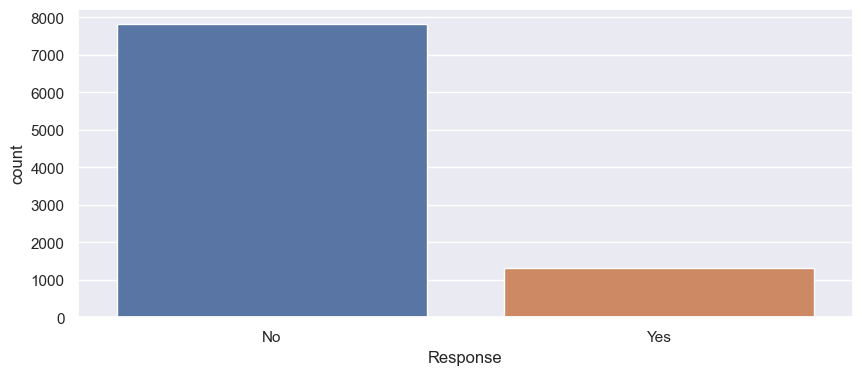

In [12]:
# Univariate Analysis 
sns.countplot(data=data, x='Response')



*   Responses are heavily imbalanced . A large number of customers did not churn .






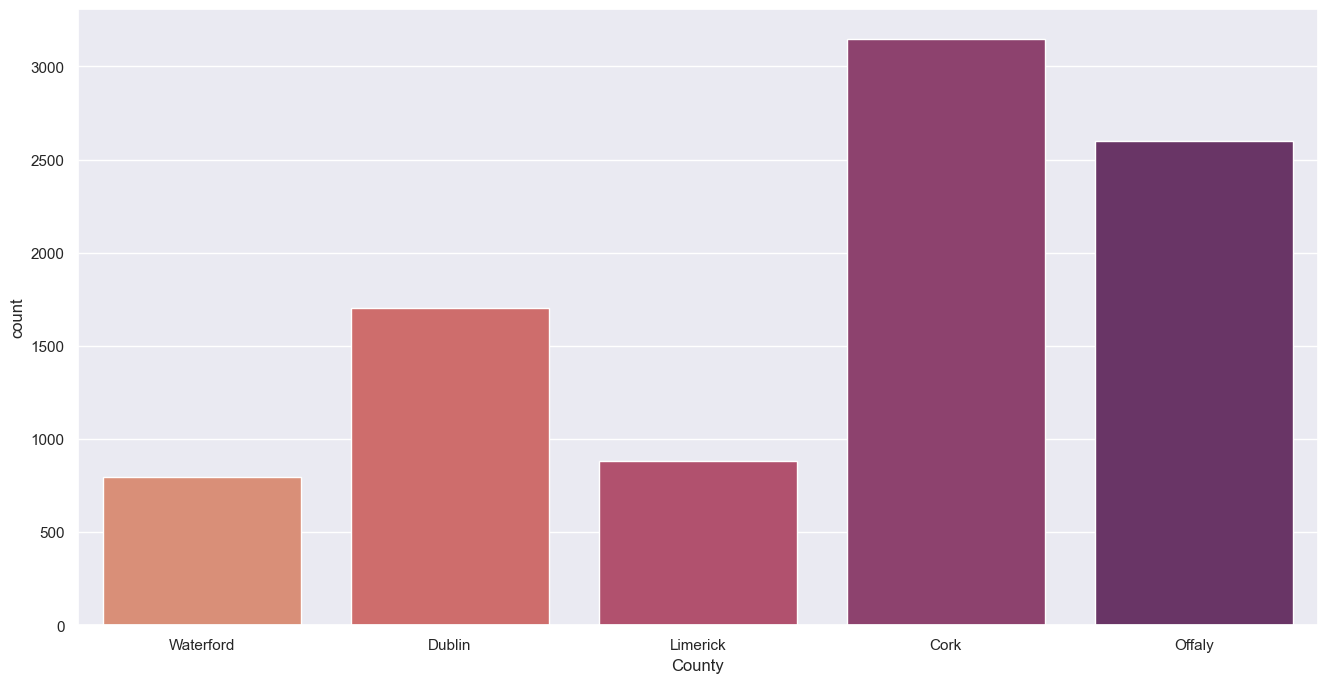

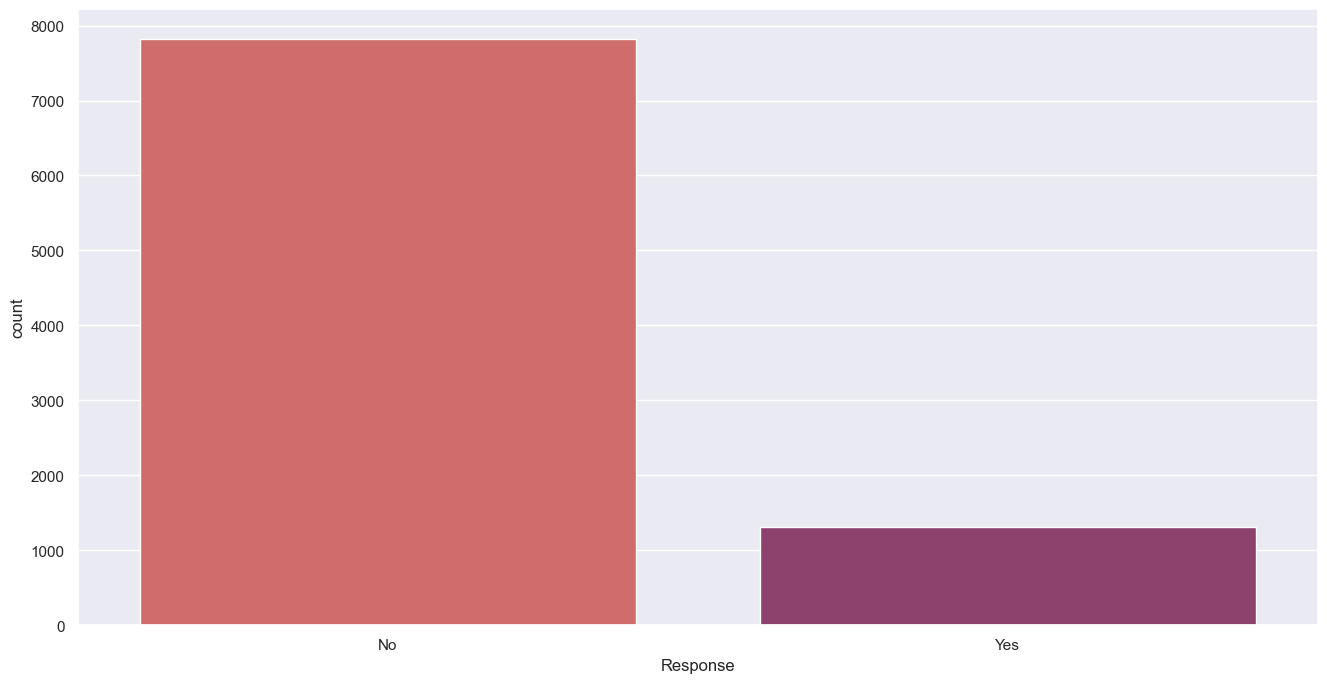

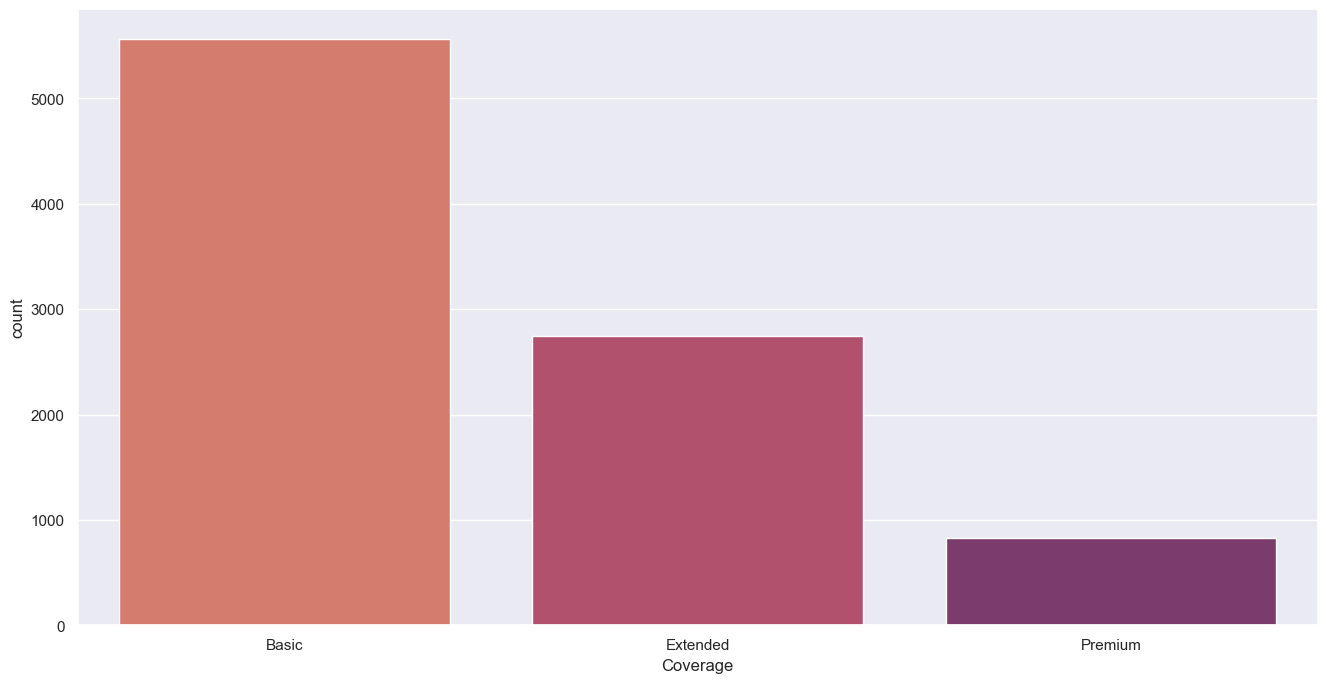

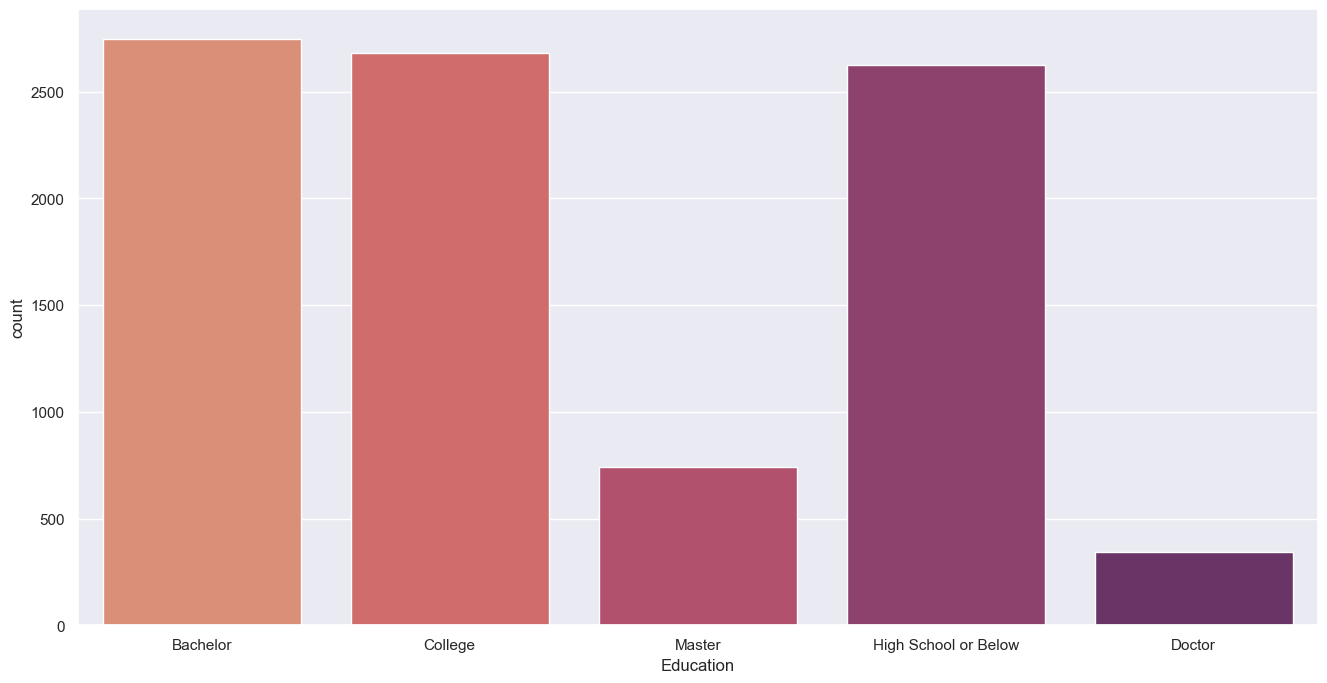

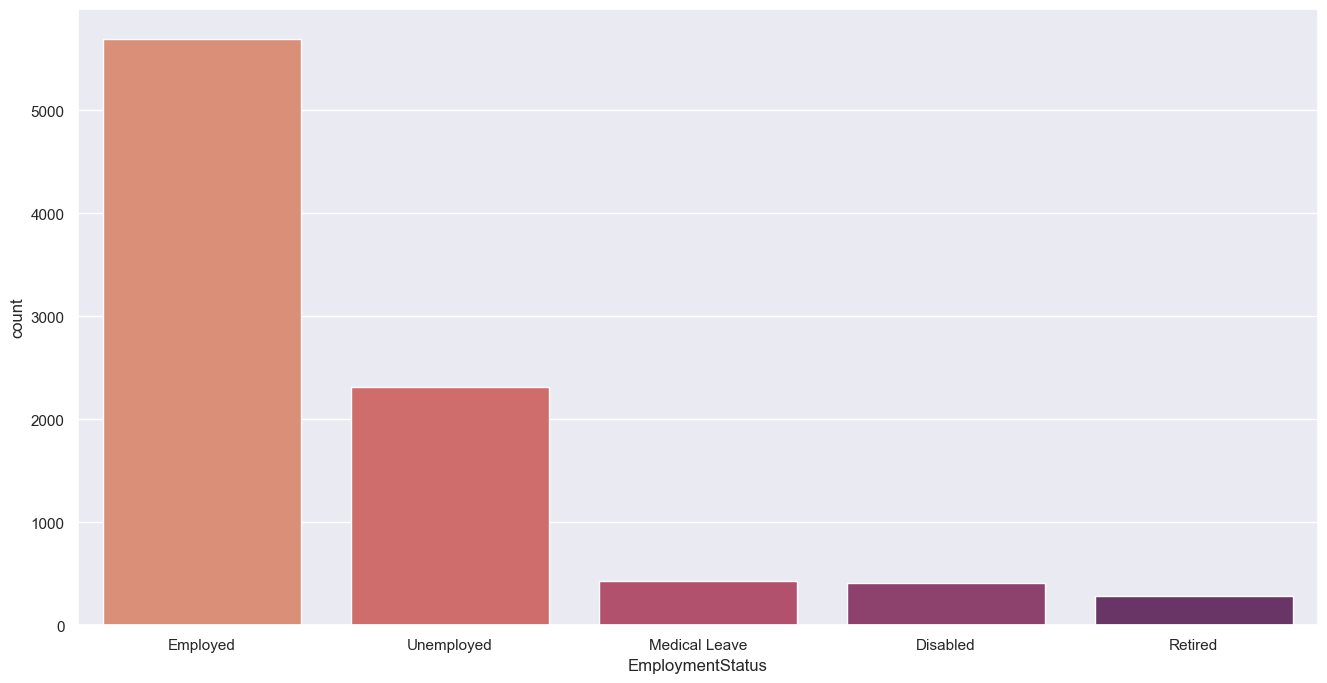

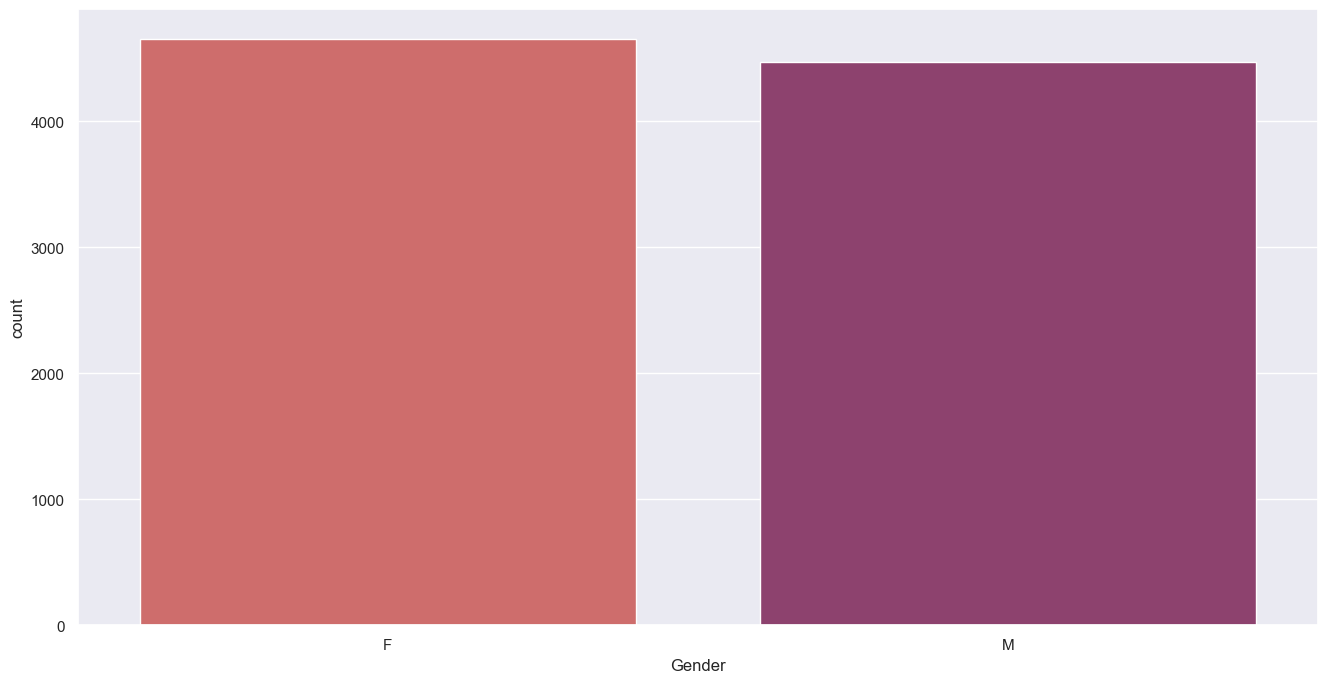

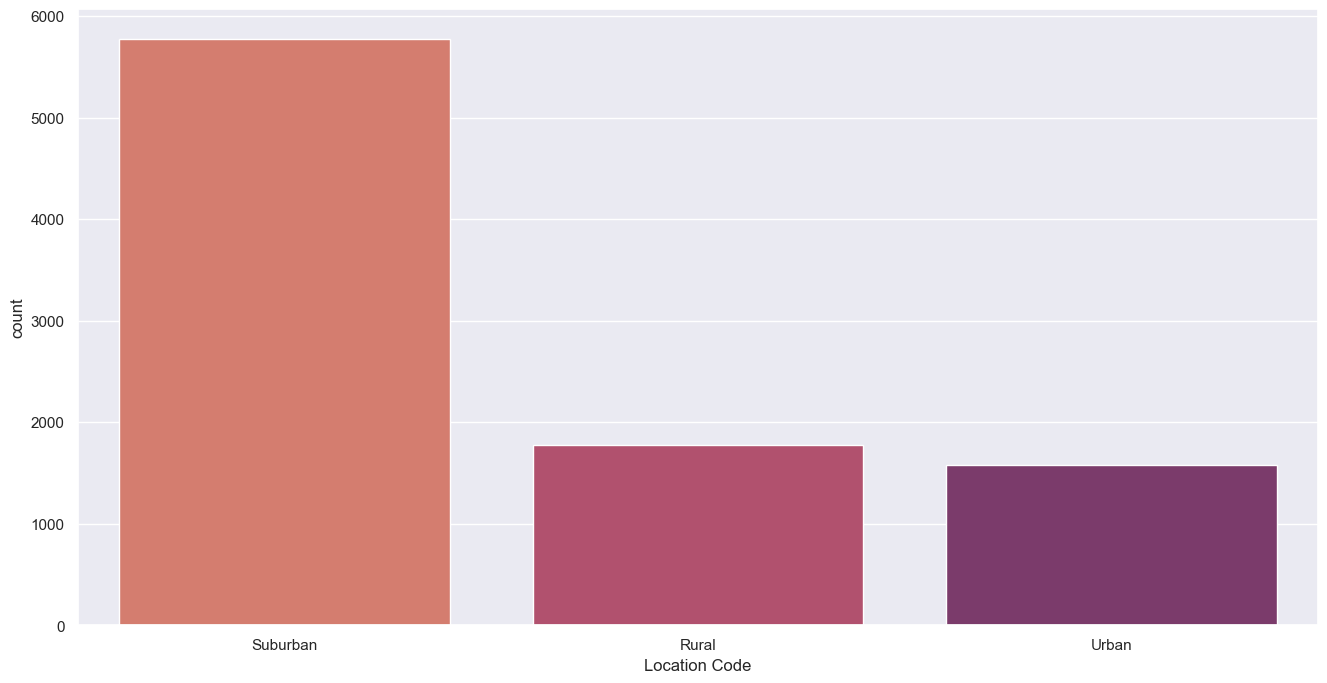

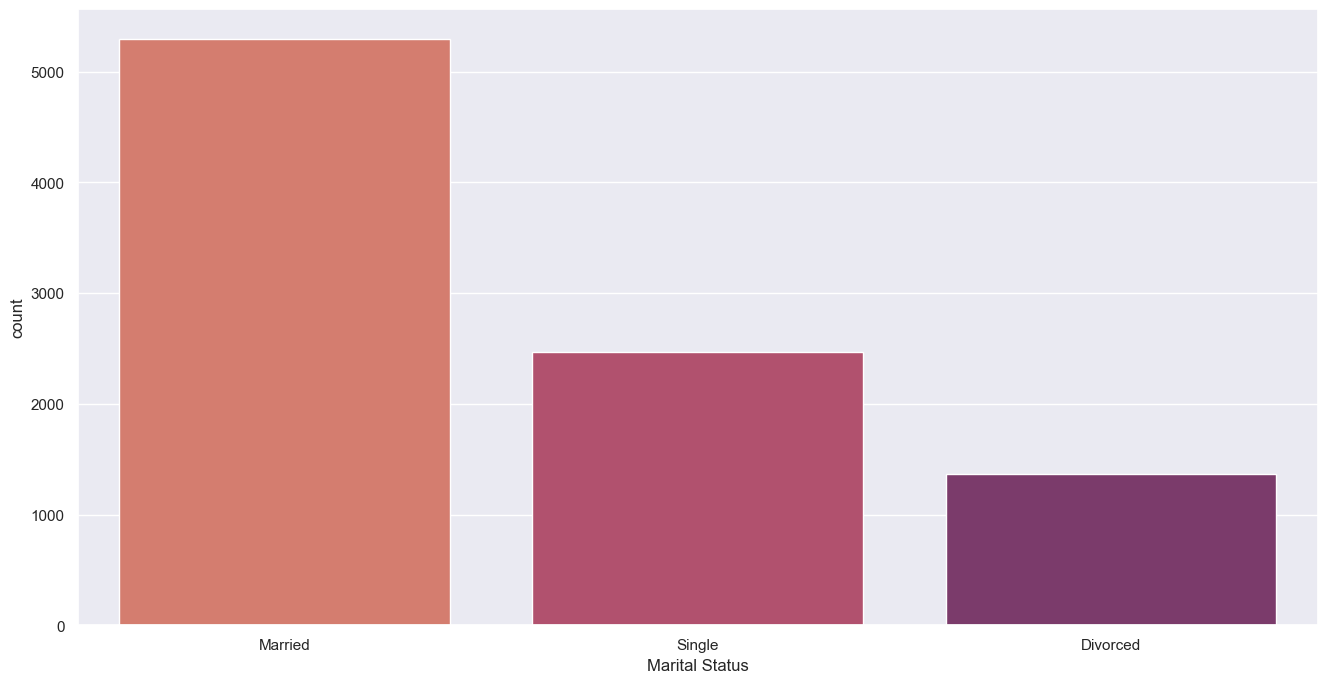

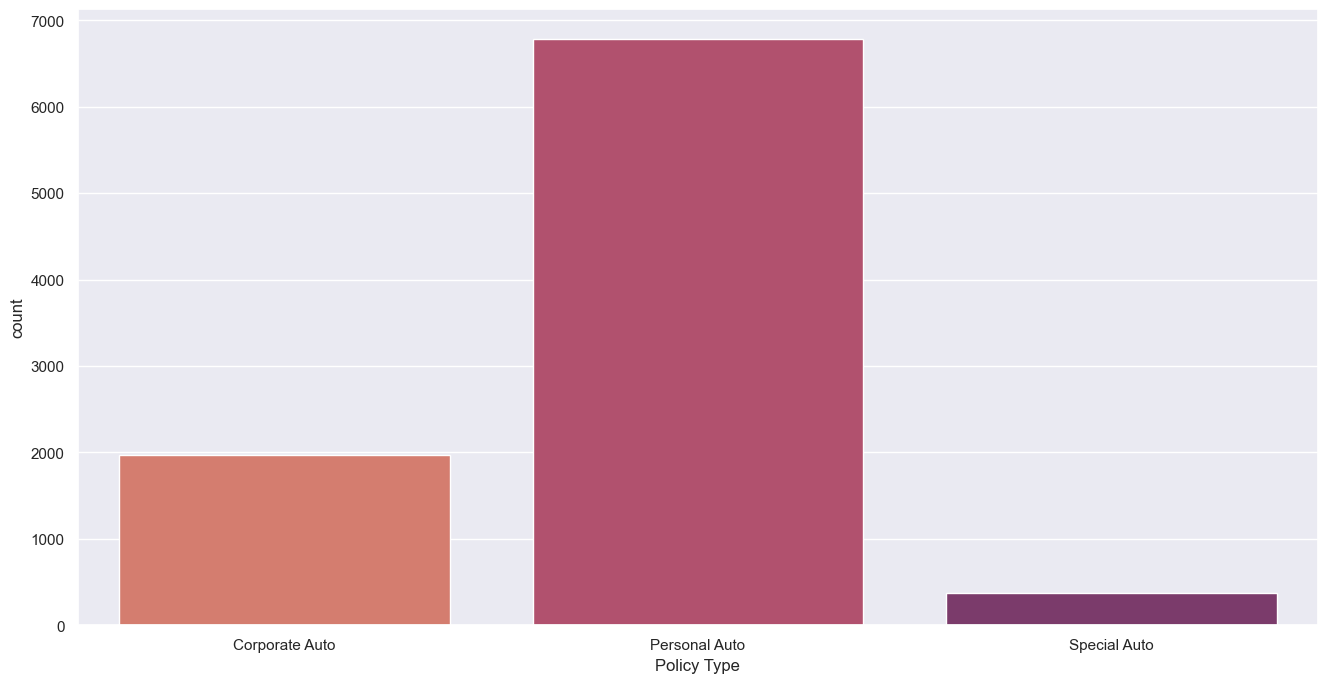

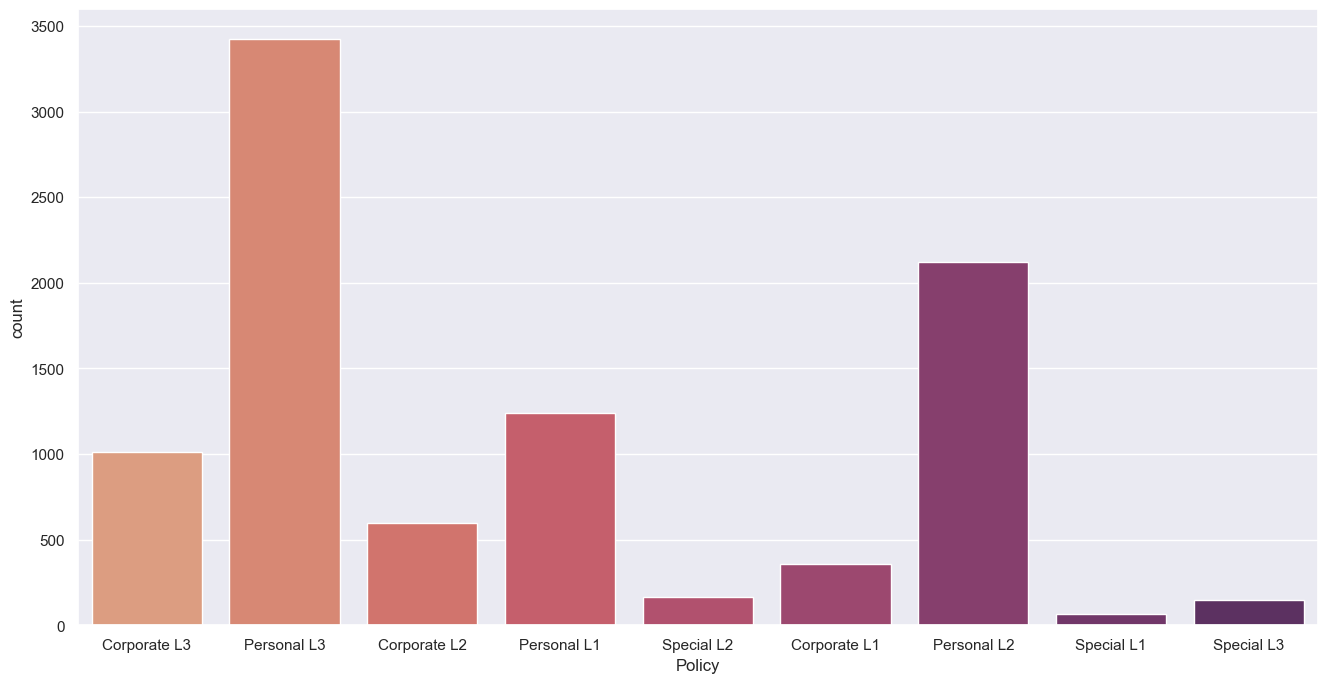

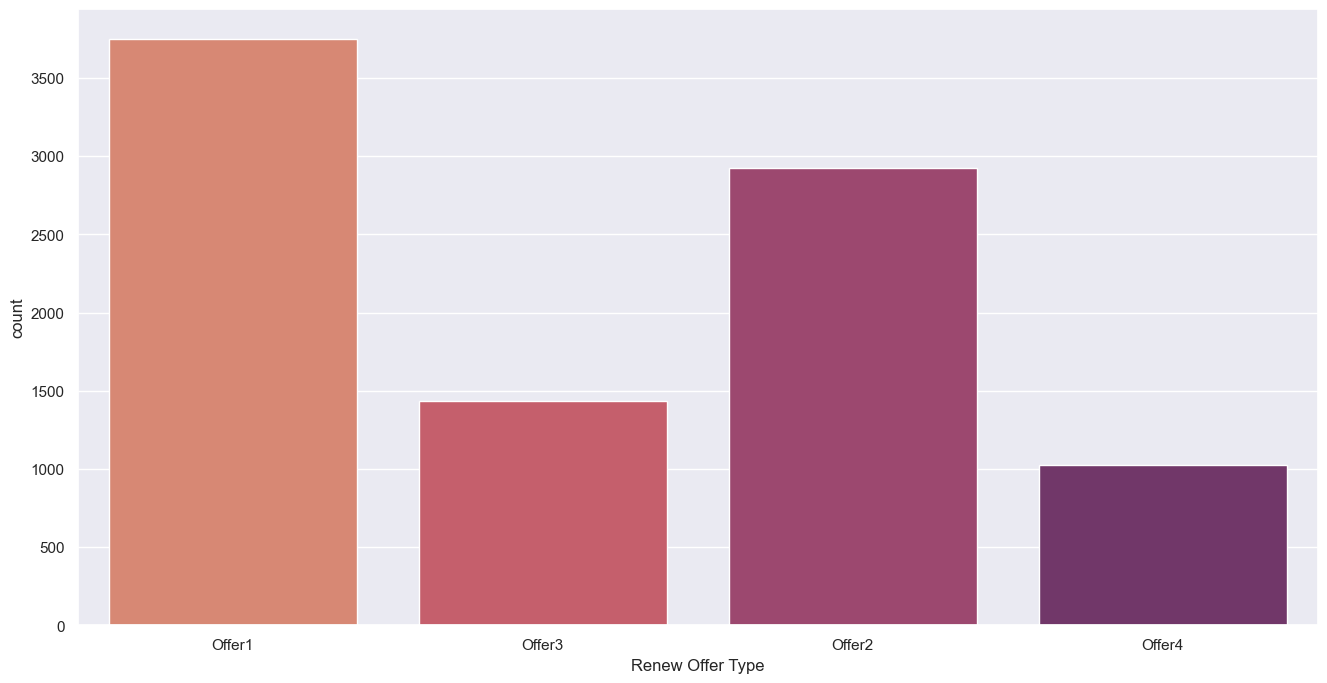

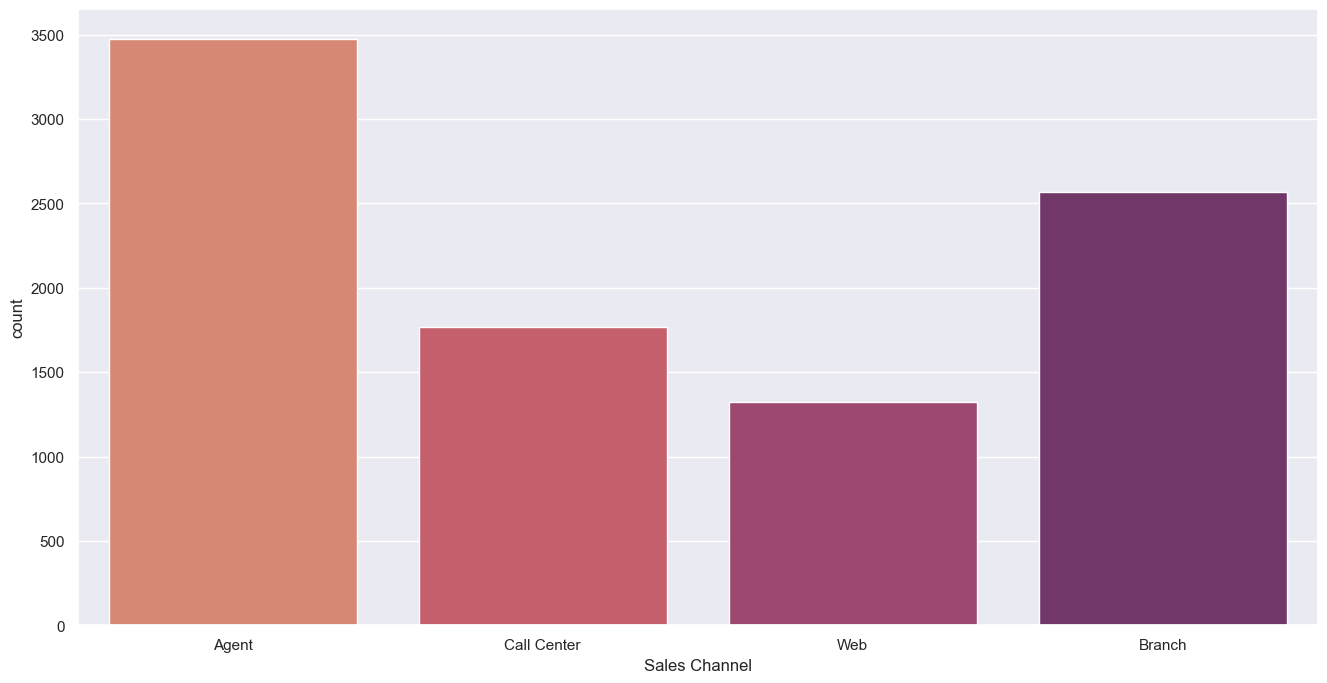

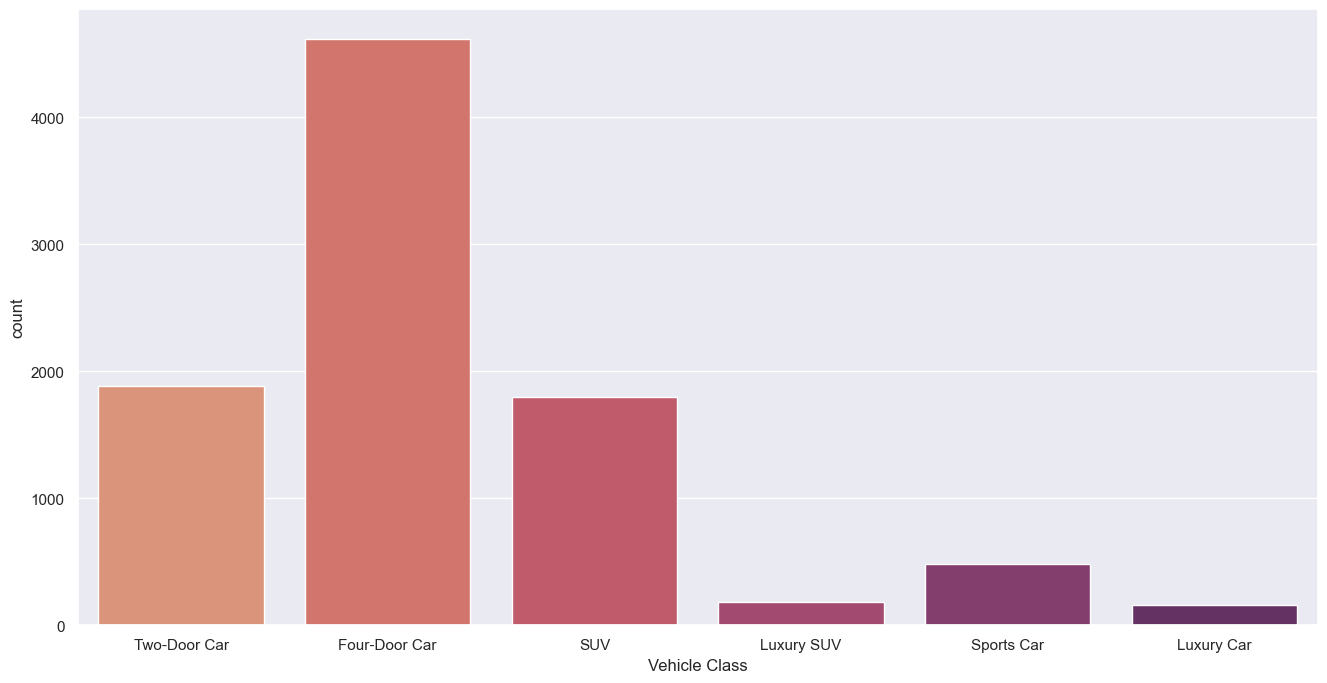

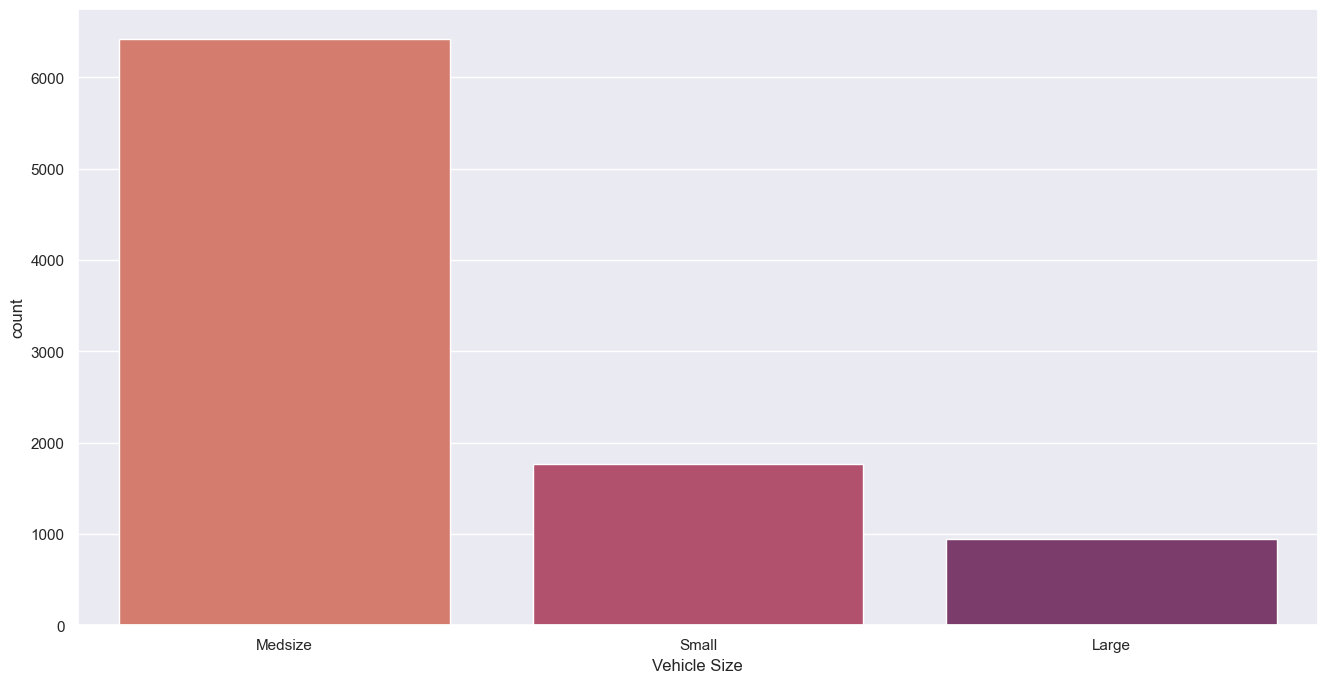

In [13]:
#categiorical variables plotted
for col in data:
    if data[col].dtype == pd.CategoricalDtype:
        plt.figure(figsize=(16,8))
        sns.countplot(x=col,
                      data=data,
                      palette='flare')


In [14]:
# removing outliers
# Calculate first and third quartile
first_quartile = data['Total Claim Amount'].describe()['25%']
third_quartile = data['Total Claim Amount'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Total Claim Amount'] > (first_quartile - 3 * iqr)) &
            (data['Total Claim Amount'] < (third_quartile + 3 * iqr))]


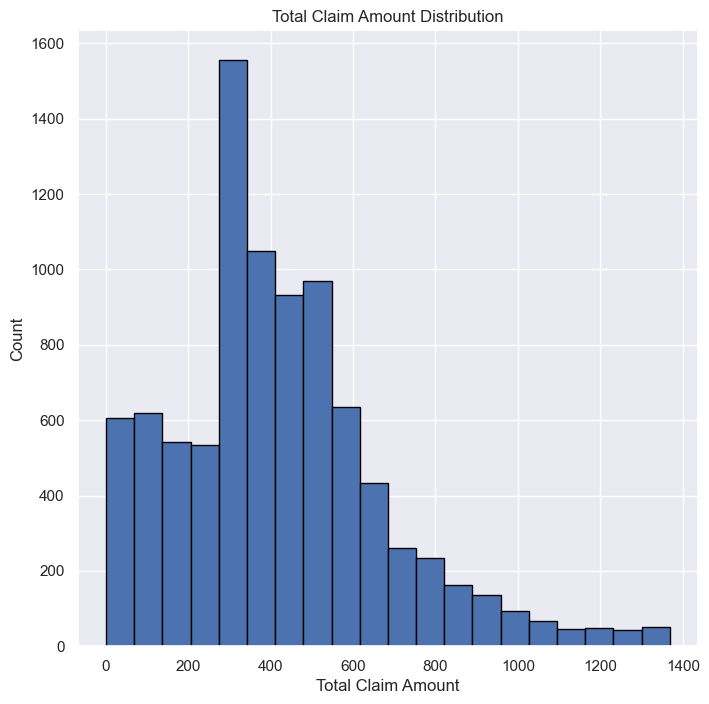

In [15]:
# Histogram Plot of Total Claim Amount
figsize(8, 8)
plt.hist(data['Total Claim Amount'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Total Claim Amount'); 
plt.ylabel('Count'); plt.title('Total Claim Amount Distribution');

In [16]:
# removing outliers
# Calculate first and third quartile
first_quartile = data['Customer Lifetime Value'].describe()['25%']
third_quartile = data['Customer Lifetime Value'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Customer Lifetime Value'] > (first_quartile - 3 * iqr)) &
            (data['Customer Lifetime Value'] < (third_quartile + 3 * iqr))]


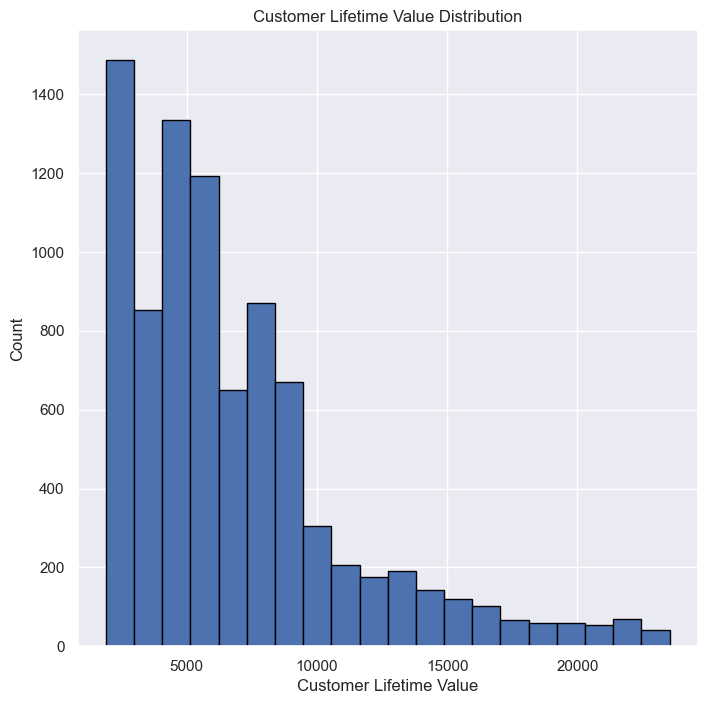

In [17]:
# Histogram Plot of Customer Lifetime Value
figsize(8, 8)
plt.hist(data['Customer Lifetime Value'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Customer Lifetime Value'); 
plt.ylabel('Count'); plt.title('Customer Lifetime Value Distribution');

<Figure size 1600x800 with 0 Axes>

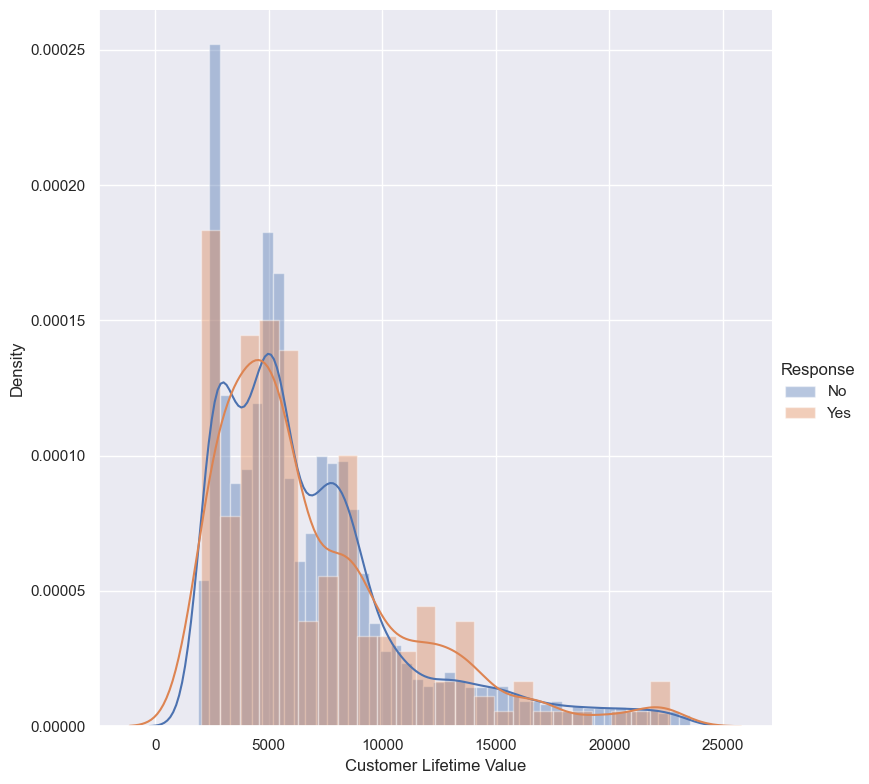

<Figure size 1600x800 with 0 Axes>

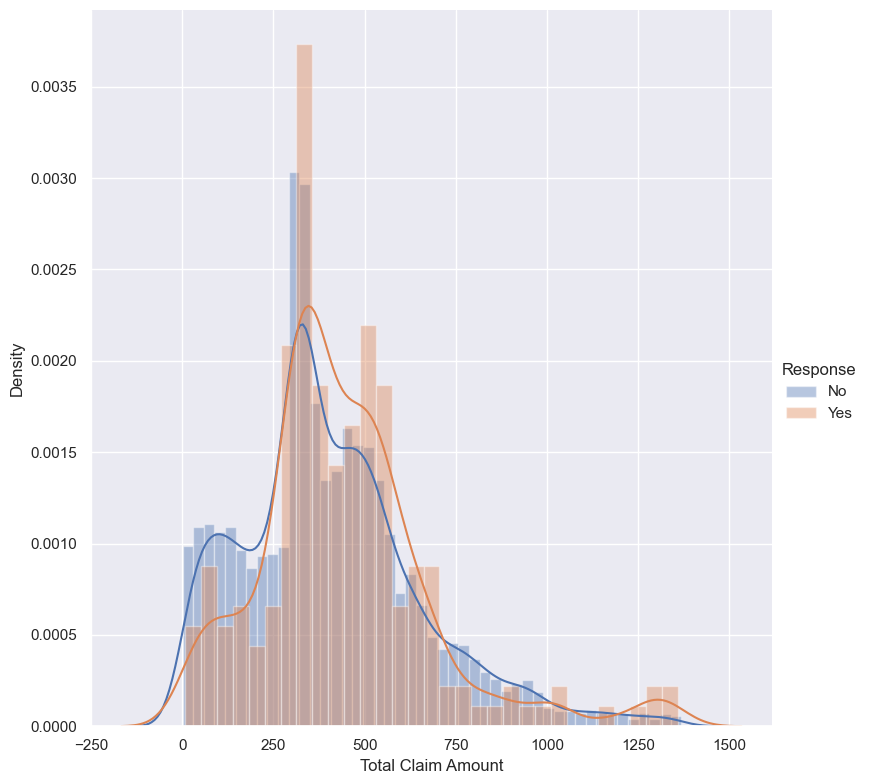

In [18]:
for col in data:
    if data[col].dtype == np.float64:
        plt.figure(figsize=(16,8))
        sns.FacetGrid(data,
                      hue="Response",
                      height=8).map(
                          sns.distplot,col
                      ).add_legend()

In [19]:
# removing outliers
# Calculate first and third quartile
first_quartile = data['Income'].describe()['25%']
third_quartile = data['Income'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Income'] > (first_quartile - 3 * iqr)) &
            (data['Income'] < (third_quartile + 3 * iqr))]


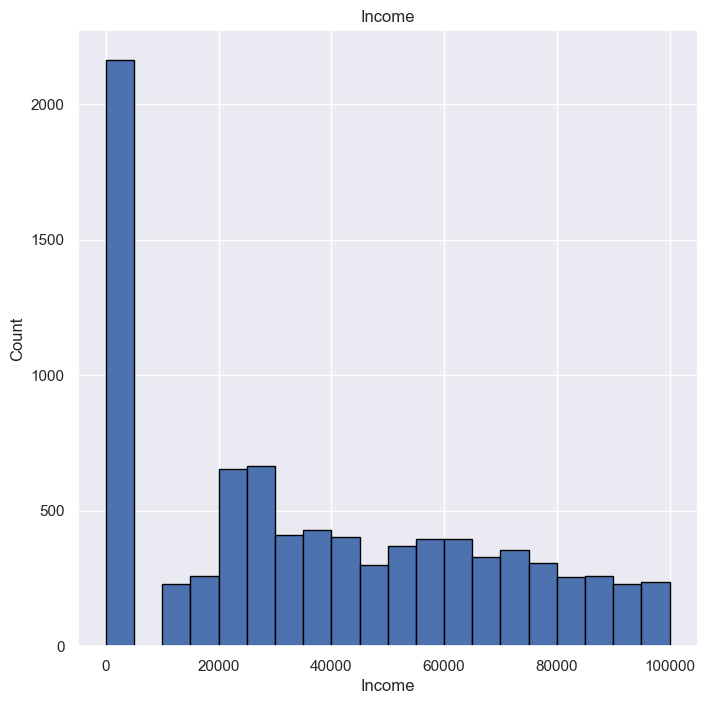

In [20]:
# Histogram Plot of Income
figsize(8, 8)
plt.hist(data['Income'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Income'); 
plt.ylabel('Count'); plt.title('Income');

This is suspicious . Over 2000+ respondents have an income of 0.
This might mean they did not provide this information or they were taken out intentionally.

In [21]:
data['Income'].describe()

count     8650.000000
mean     37926.516532
std      30396.697764
min          0.000000
25%          0.000000
50%      34388.000000
75%      62464.000000
max      99981.000000
Name: Income, dtype: float64

In [22]:
# converting Response into 1 and 0 
data['Response'] = pd.factorize(data['Response'])[0]

In [23]:
anom = data[data['Income'] == 0]
non_anom = data[data['Income'] != 0]
print('The non-anomalies churn  %0.2f%% ' % (100 * non_anom['Response'].mean()))
print('The anomalies churn  %0.2f%% ' % (100 * anom['Response'].mean()))
print('There are %d anomalous income' % len(anom))

The non-anomalies churn  16.28% 
The anomalies churn  9.15% 
There are 2164 anomalous income


Well that is extremely interesting! It turns out that the anomalies have a lower rate of churn.

Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these data share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

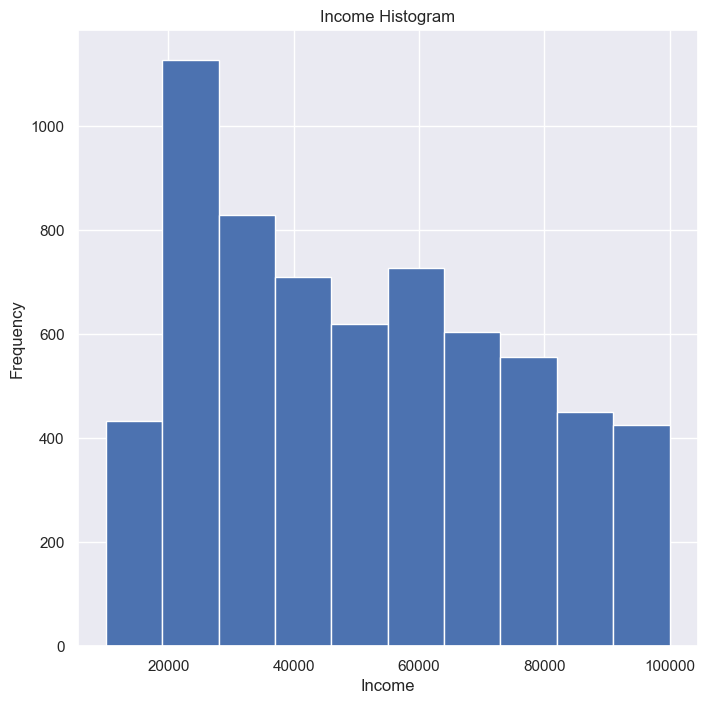

In [24]:
# Create an anomalous flag column
data['Income_Anom'] = data["Income"] == 0

# Replace the anomalous values with nan
data['Income'].replace({0: np.nan}, inplace = True)

data['Income'].plot.hist(title = 'Income Histogram');
plt.xlabel('Income');

The distribution looks to be much more in line with what we would expect, and we also have created a new column to tell the model that these values were originally anomalous (becuase we will have to fill in the nans with some value, probably the median of the column). 

In [25]:
# removing outliers
# Calculate first and third quartile
first_quartile = data['Monthly Premium Auto'].describe()['25%']
third_quartile = data['Monthly Premium Auto'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Monthly Premium Auto'] > (first_quartile - 3 * iqr)) &
            (data['Monthly Premium Auto'] < (third_quartile + 3 * iqr))]


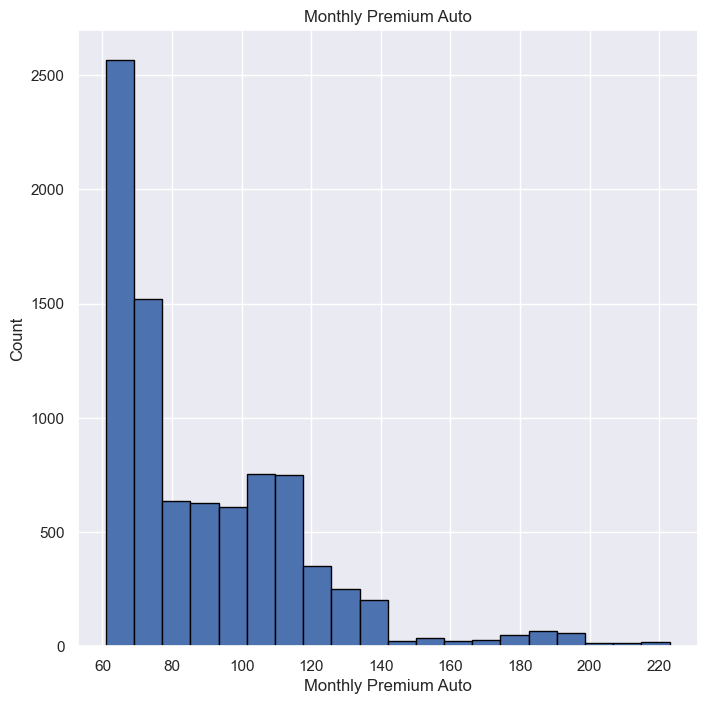

In [26]:
# Histogram Plot of Monthly Premium Auto
figsize(8, 8)
plt.hist(data['Monthly Premium Auto'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Monthly Premium Auto'); 
plt.ylabel('Count'); plt.title('Monthly Premium Auto');

<Figure size 1600x800 with 0 Axes>

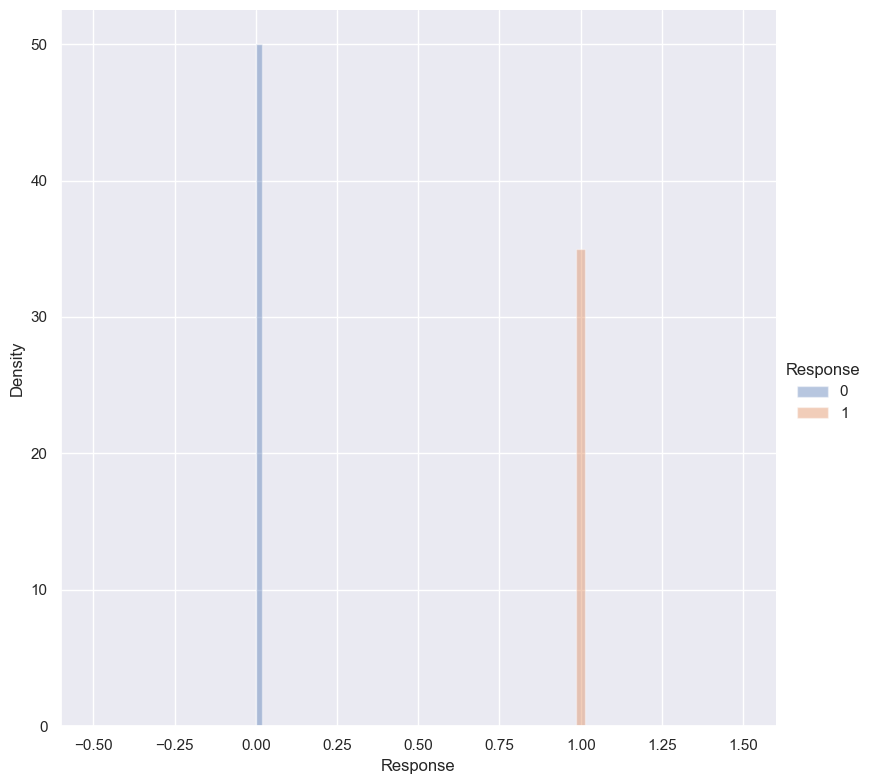

<Figure size 1600x800 with 0 Axes>

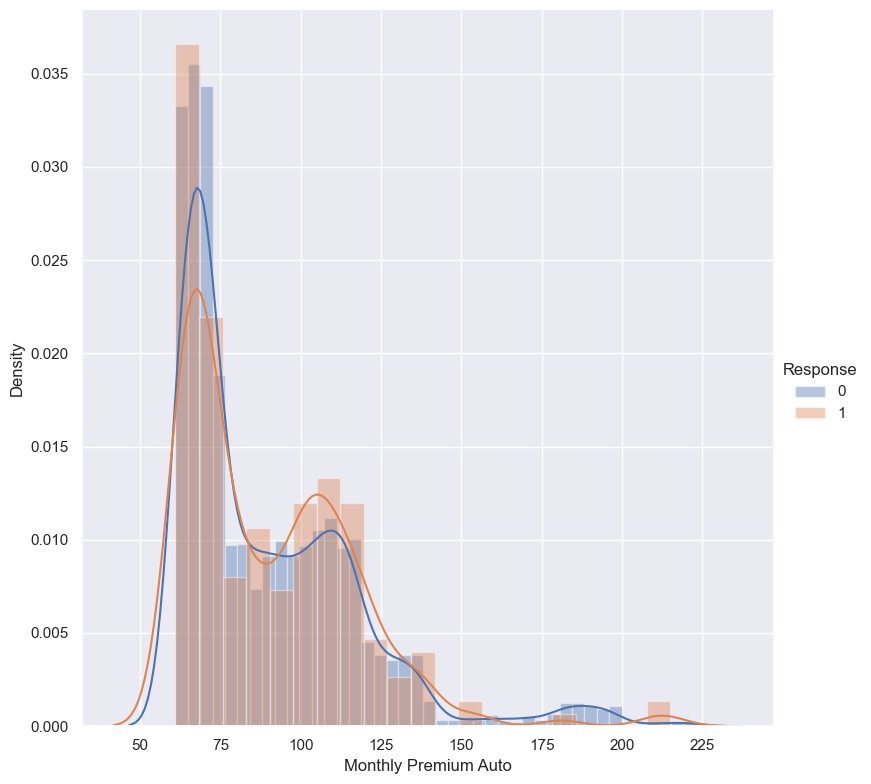

<Figure size 1600x800 with 0 Axes>

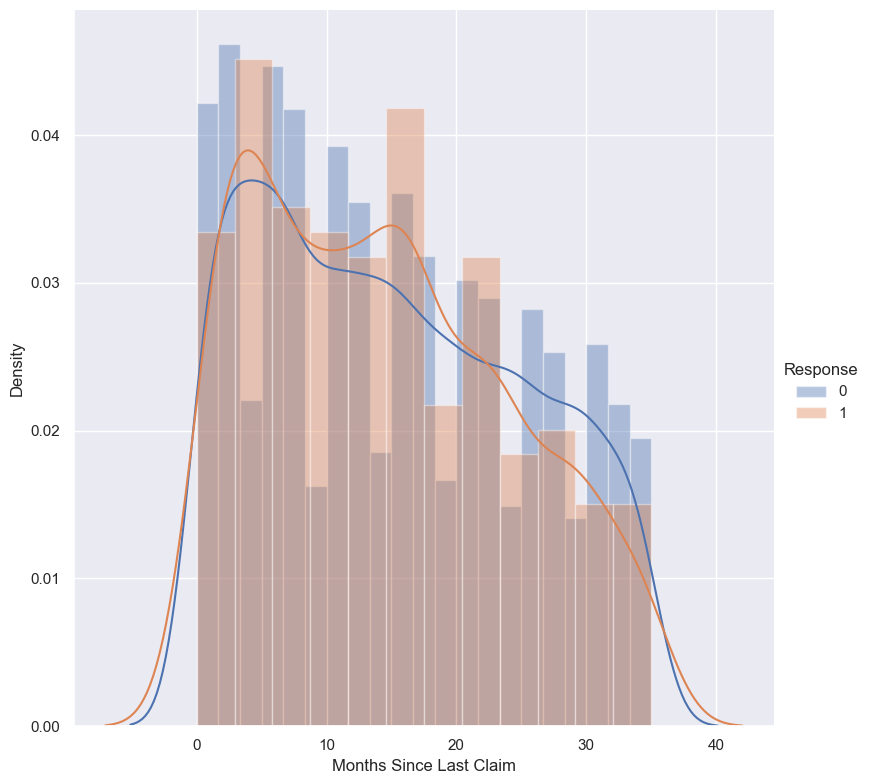

<Figure size 1600x800 with 0 Axes>

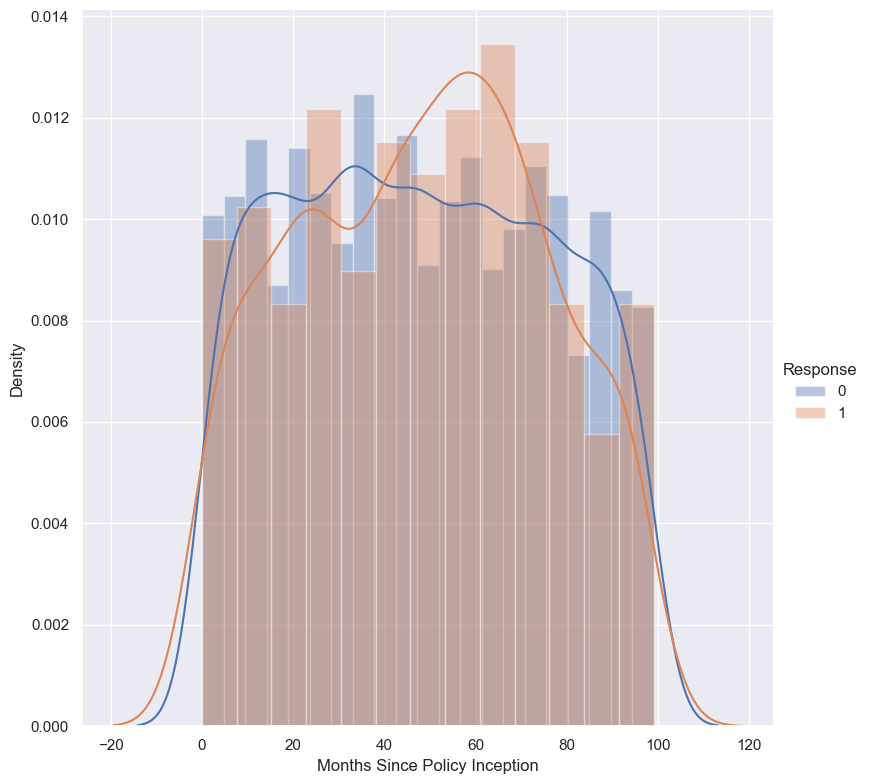

<Figure size 1600x800 with 0 Axes>

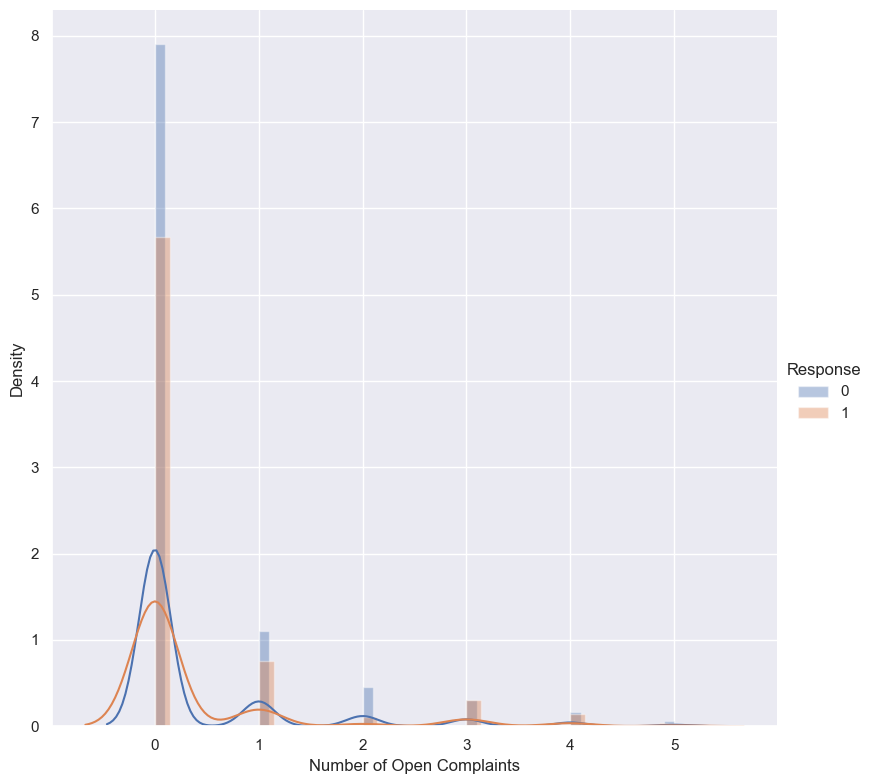

<Figure size 1600x800 with 0 Axes>

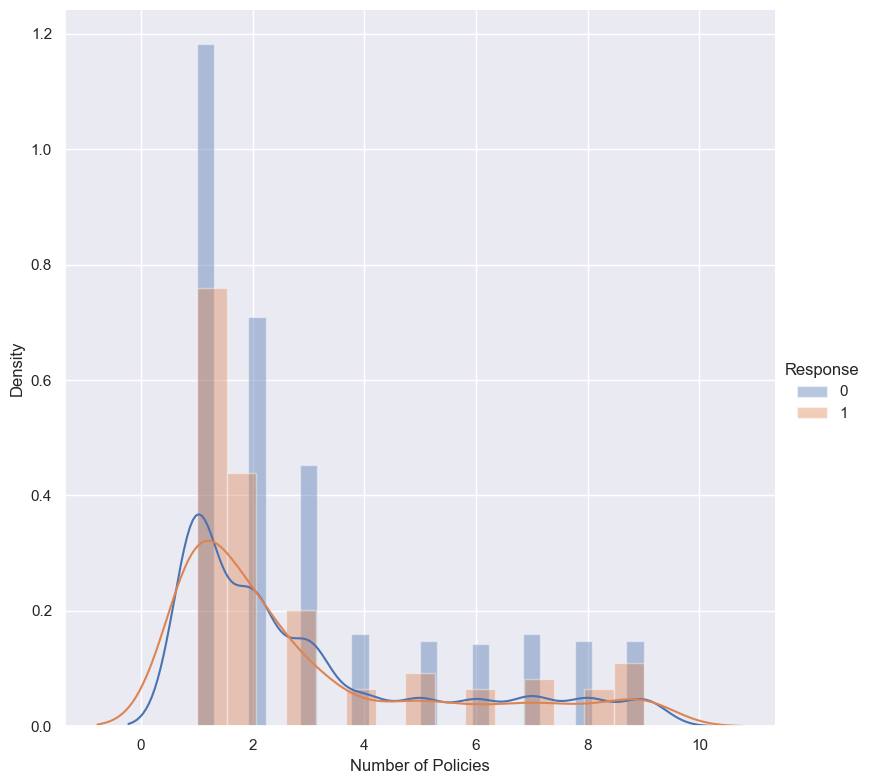

In [27]:
for col in data:
    if data[col].dtype == np.int64:
        plt.figure(figsize=(16,8))
        sns.FacetGrid(data,
                      hue="Response",
                      height=8).map(
                          sns.distplot,col
                      ).add_legend()
        

In [28]:
# Months Since Policy Inception into a separate dataframe
pol_data = data[['Response', 'Months Since Policy Inception']]

# Bin the  data
pol_data['Pol'] = pd.cut(pol_data['Months Since Policy Inception'], bins = np.linspace(0, 120, num = 4))
pol_data.head(10)

,Response,Months Since Policy Inception,Pol
0,0,5,"(0.0, 40.0]"
1,0,42,"(40.0, 80.0]"
2,0,38,"(0.0, 40.0]"
3,0,65,"(40.0, 80.0]"
4,0,44,"(40.0, 80.0]"
5,1,94,"(80.0, 120.0]"
6,1,13,"(0.0, 40.0]"
7,0,68,"(40.0, 80.0]"
9,0,7,"(0.0, 40.0]"
10,0,5,"(0.0, 40.0]"


In [29]:
# Group by the bin and calculate averages
pol_groups  = pol_data.groupby('Pol').mean()
pol_groups

,Response,Months Since Policy Inception
Pol,,
"(0.0, 40.0]",0.133071,20.806569
"(40.0, 80.0]",0.161487,60.112375
"(80.0, 120.0]",0.119557,89.710701


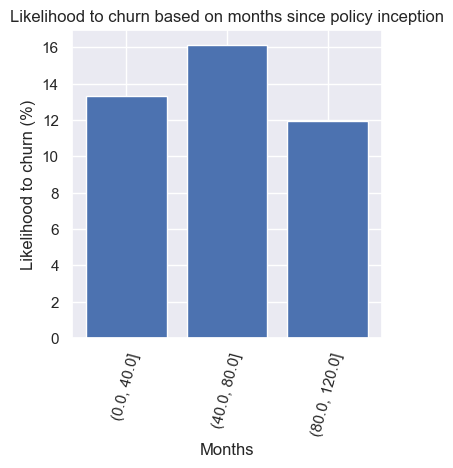

In [30]:
plt.figure(figsize = (4, 4))

# Graph the age bins and the average of the target as a bar plot
plt.bar(pol_groups.index.astype(str), 100 * pol_groups['Response'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Months'); plt.ylabel('Likelihood to churn (%)')
plt.title('Likelihood to churn based on months since policy inception');

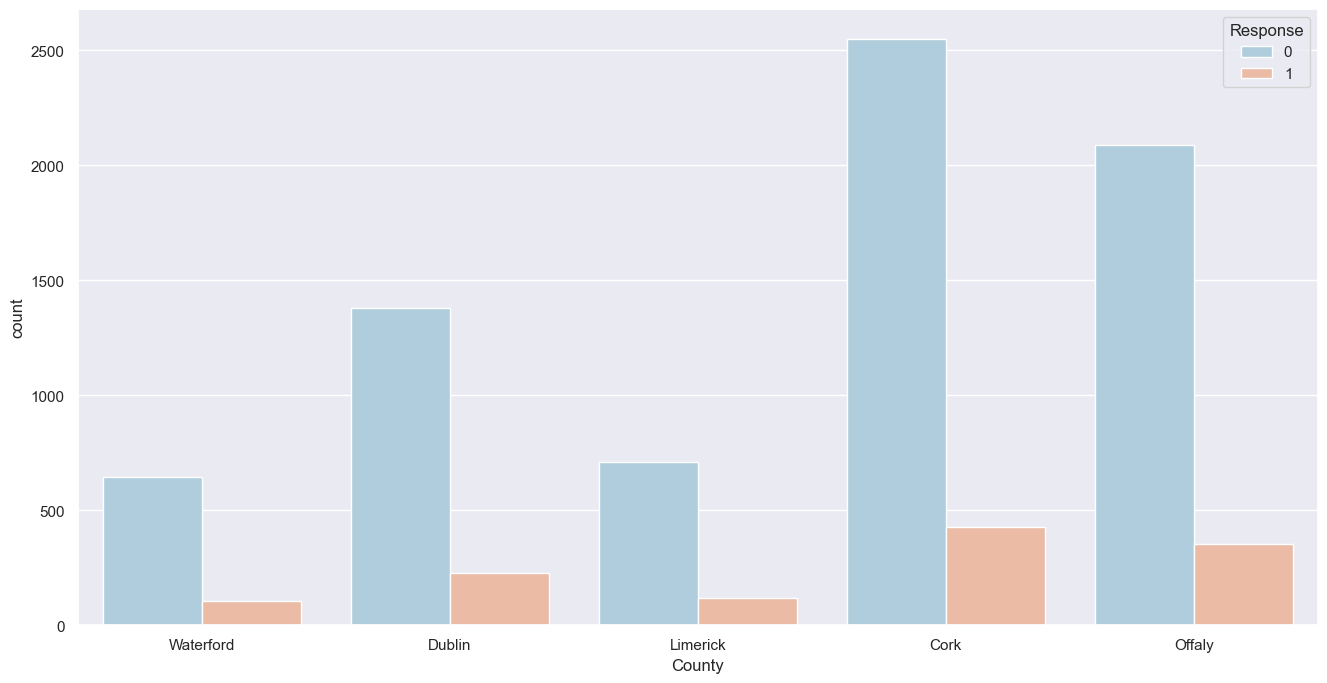

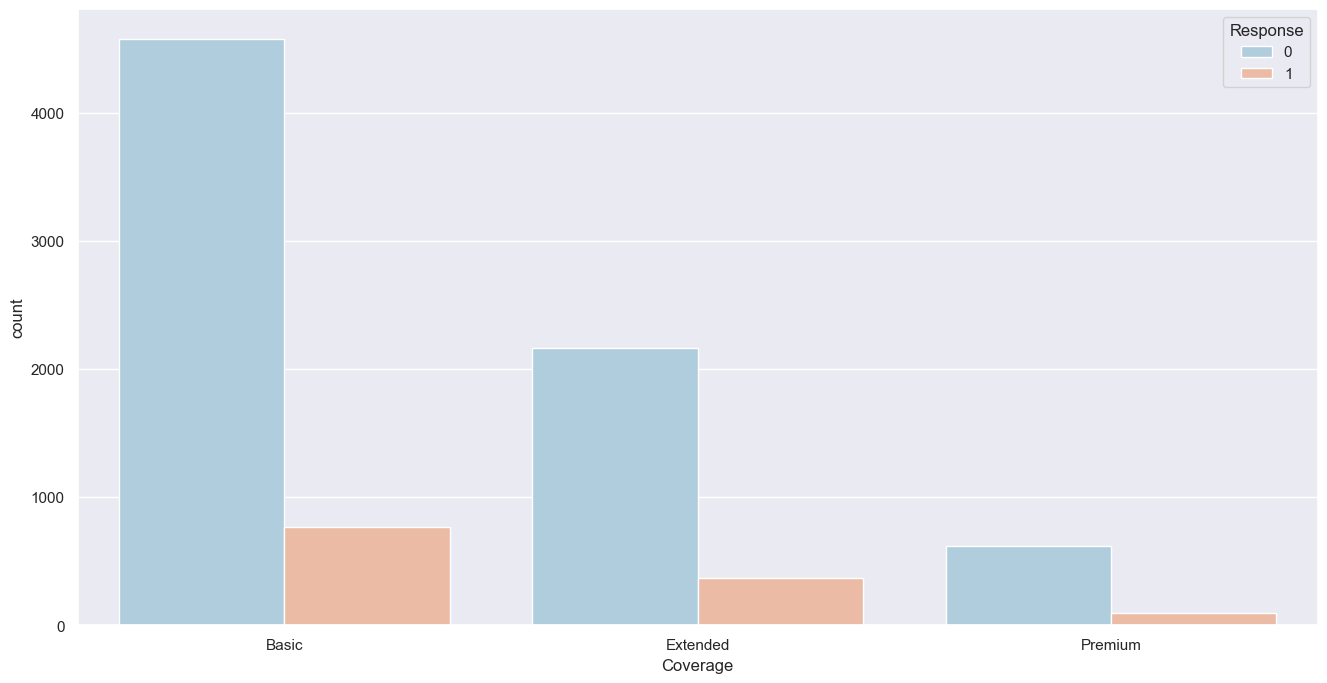

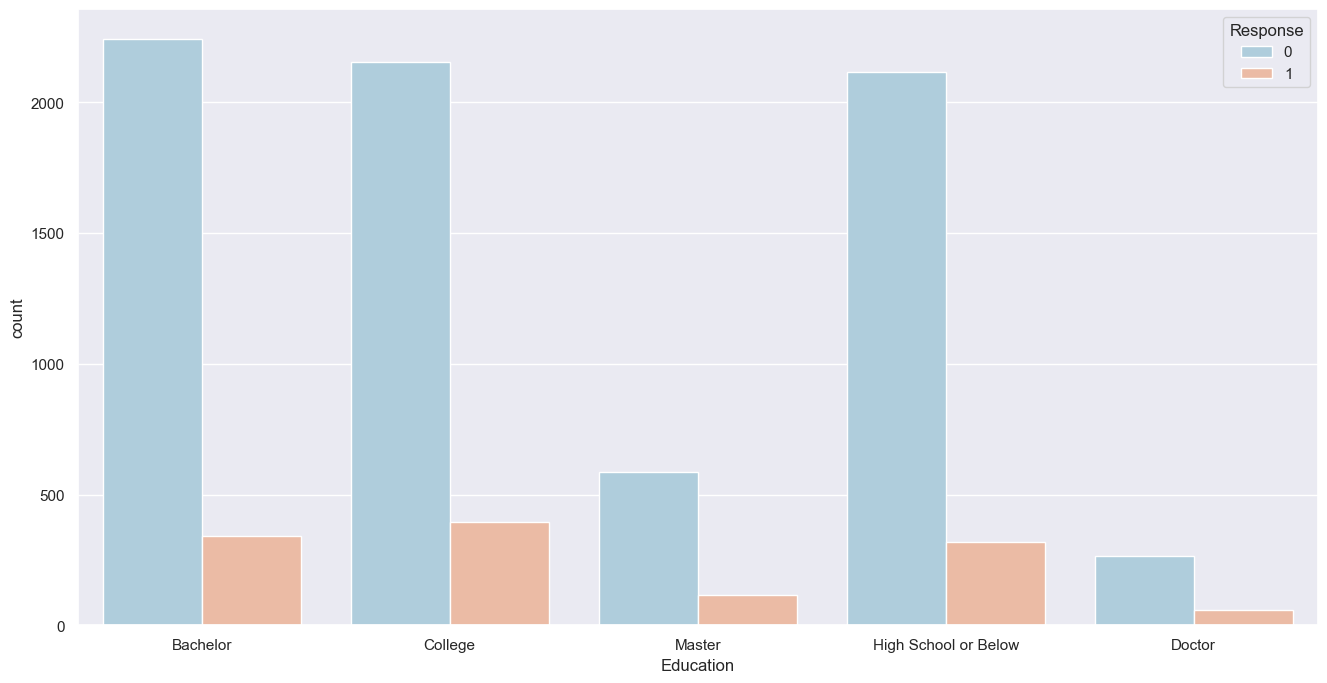

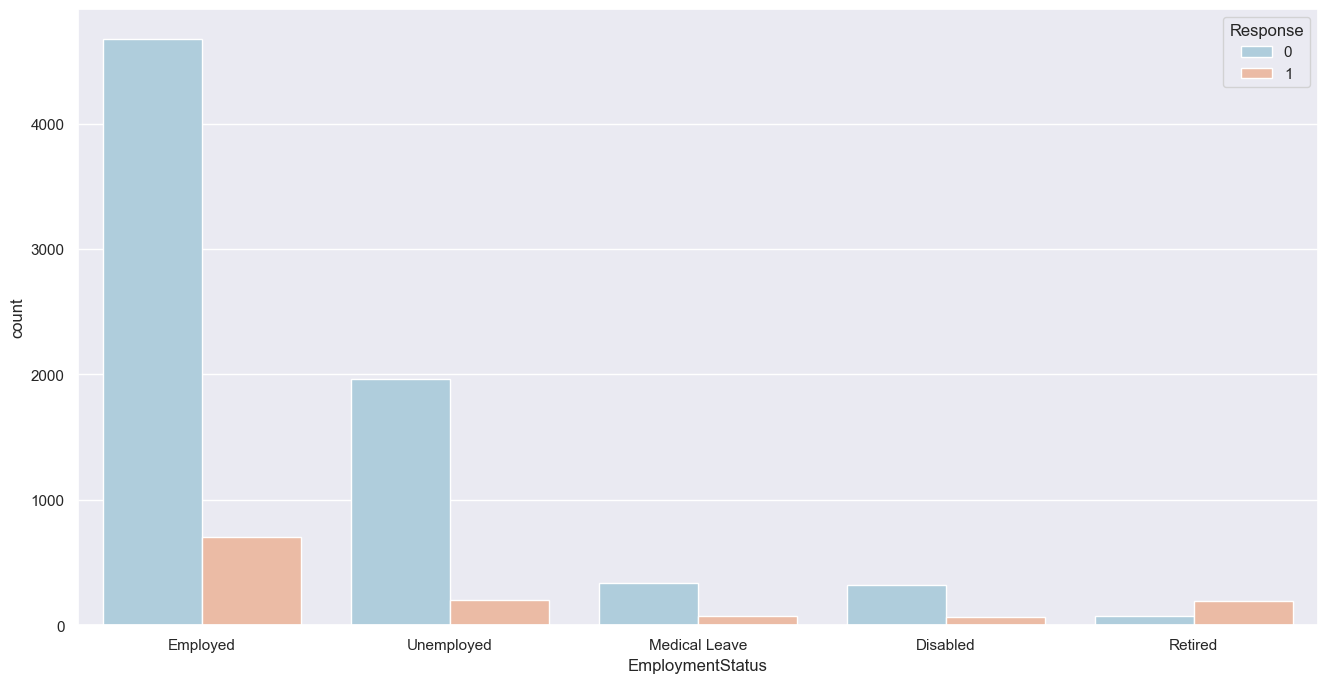

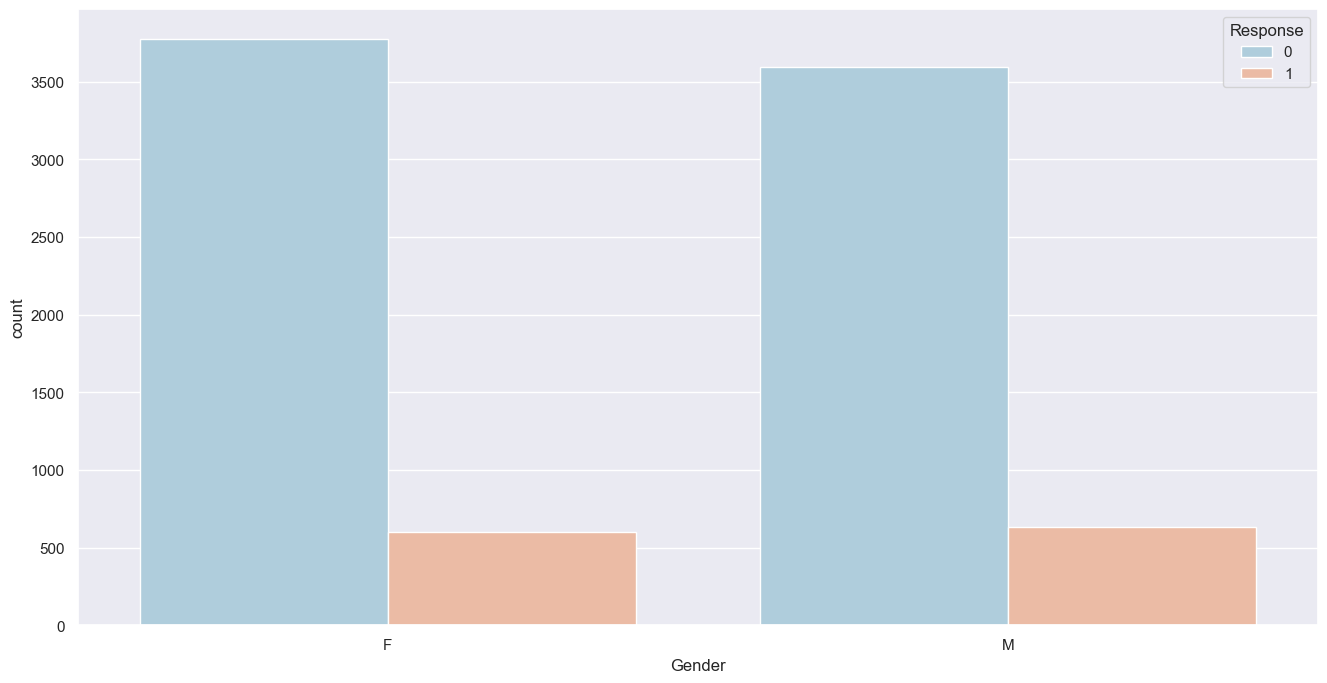

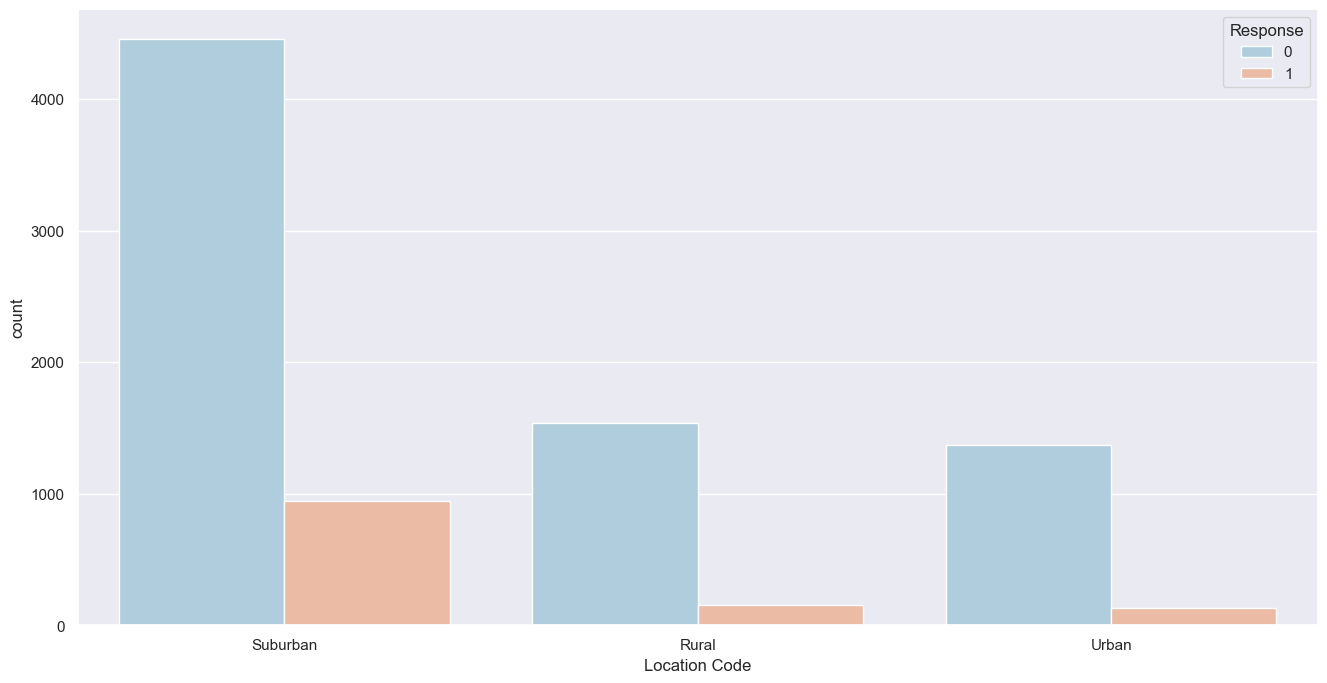

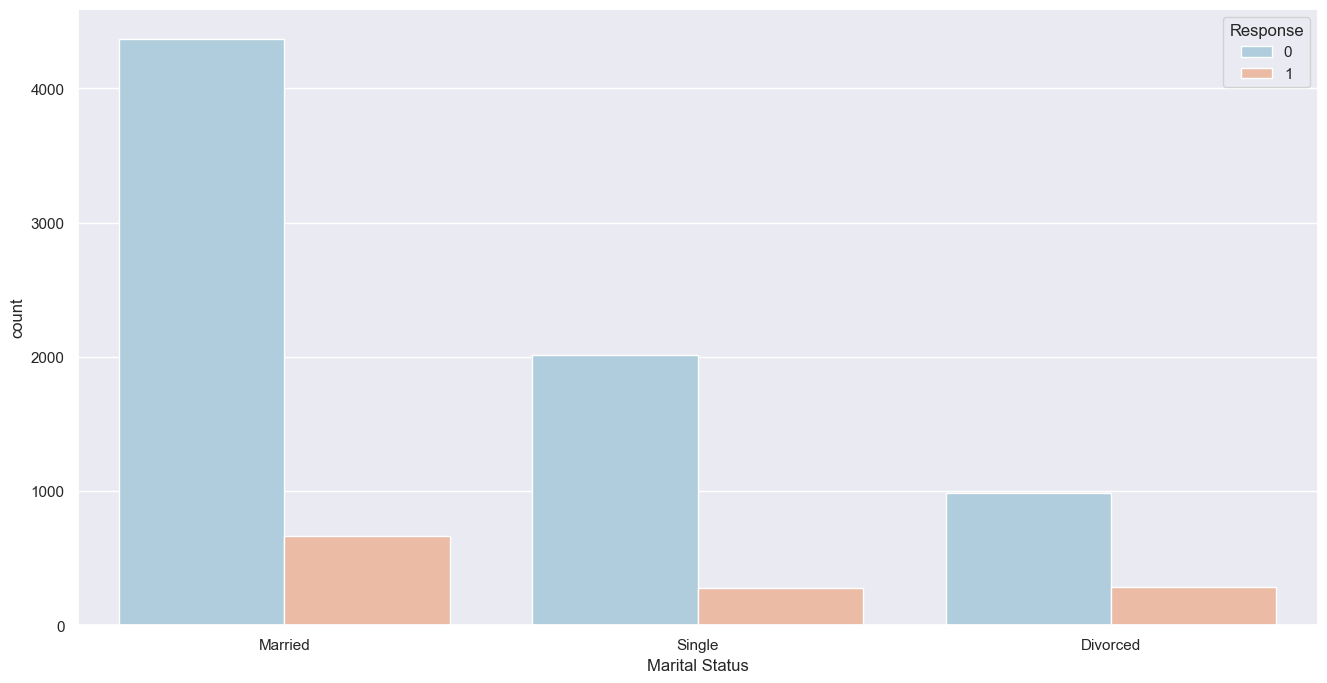

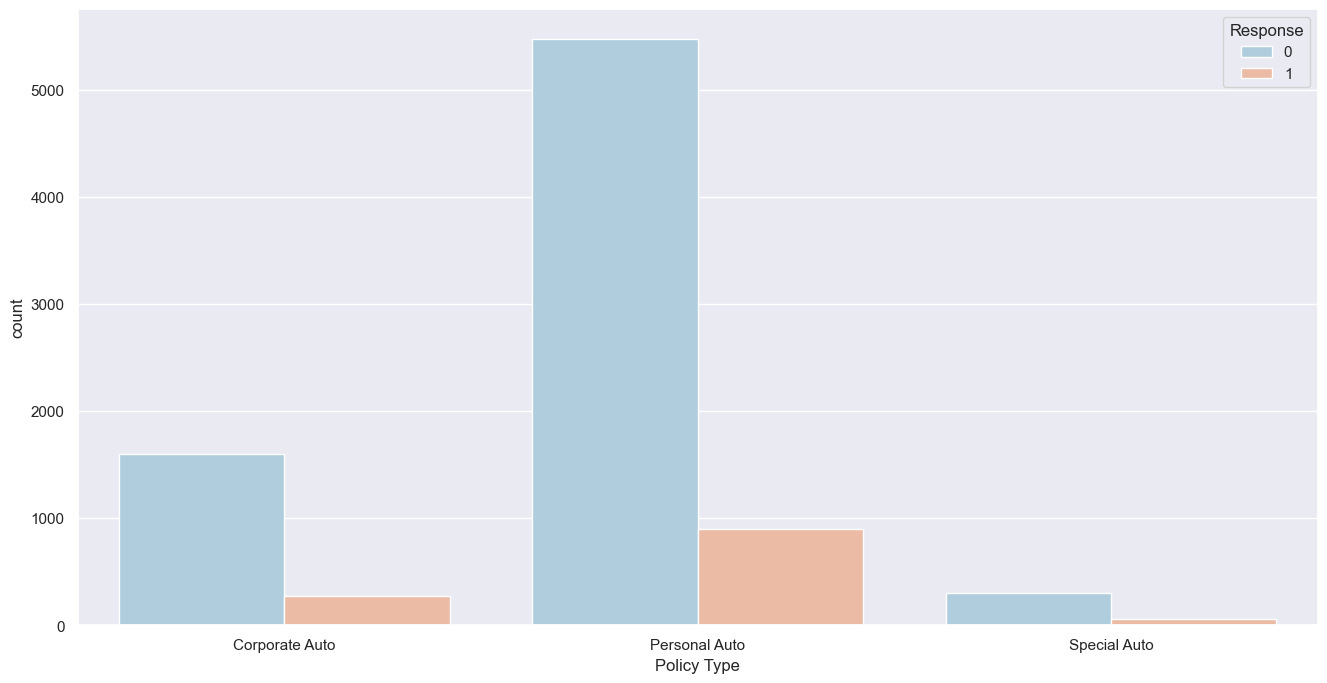

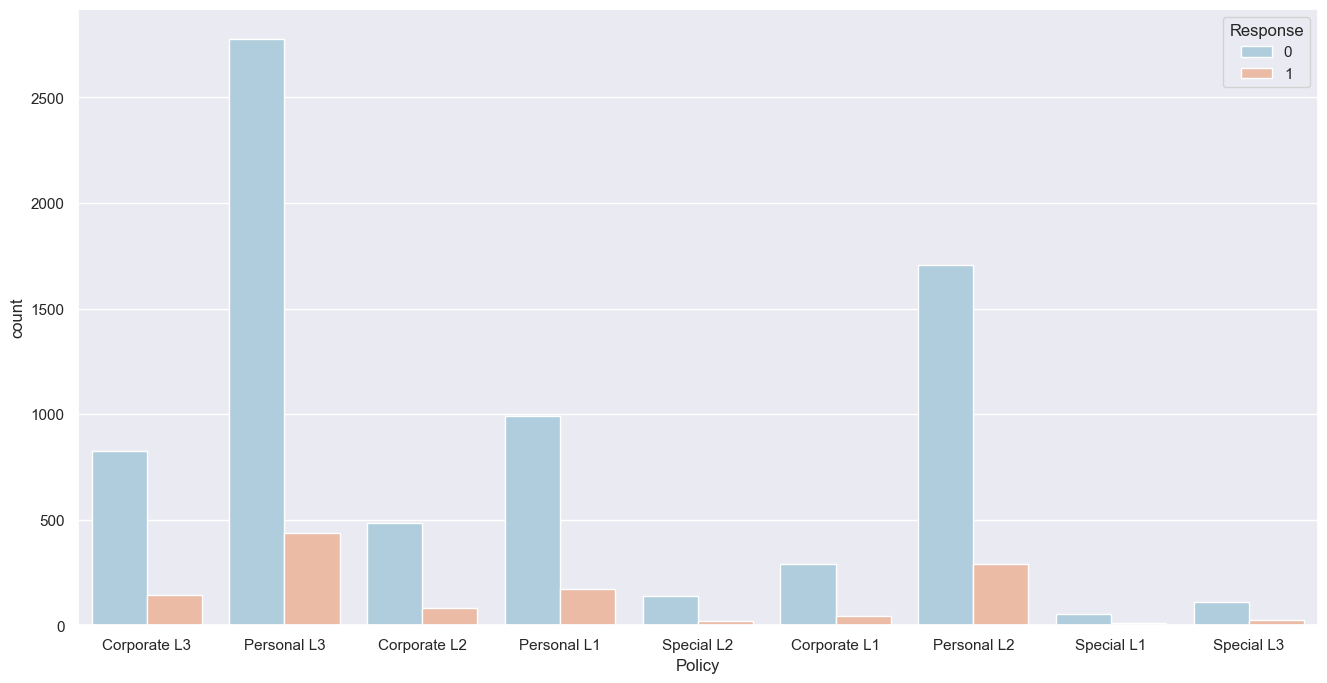

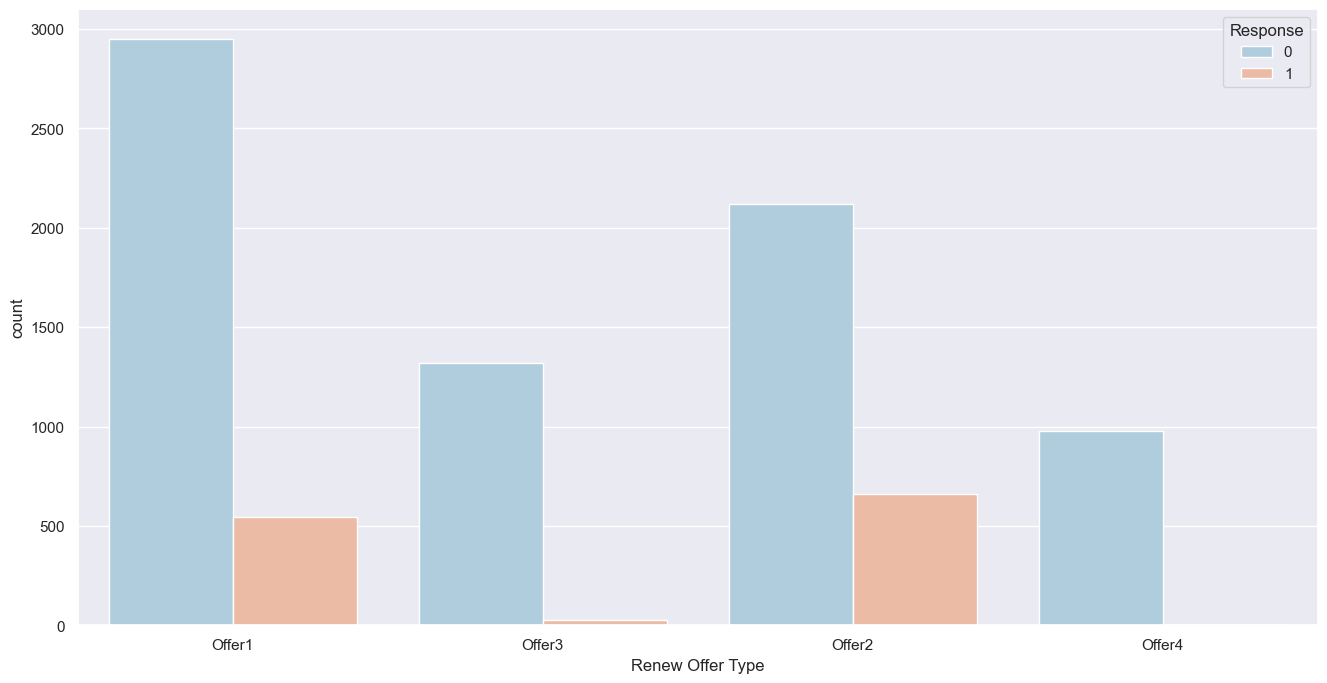

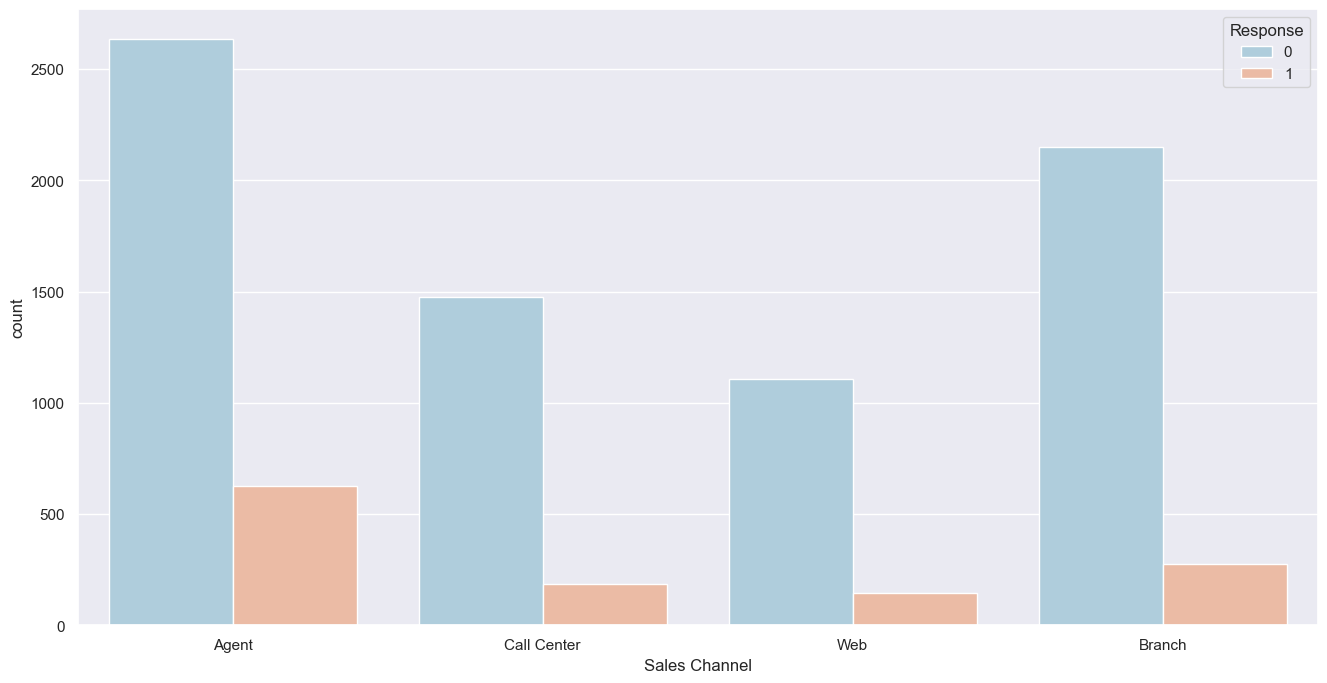

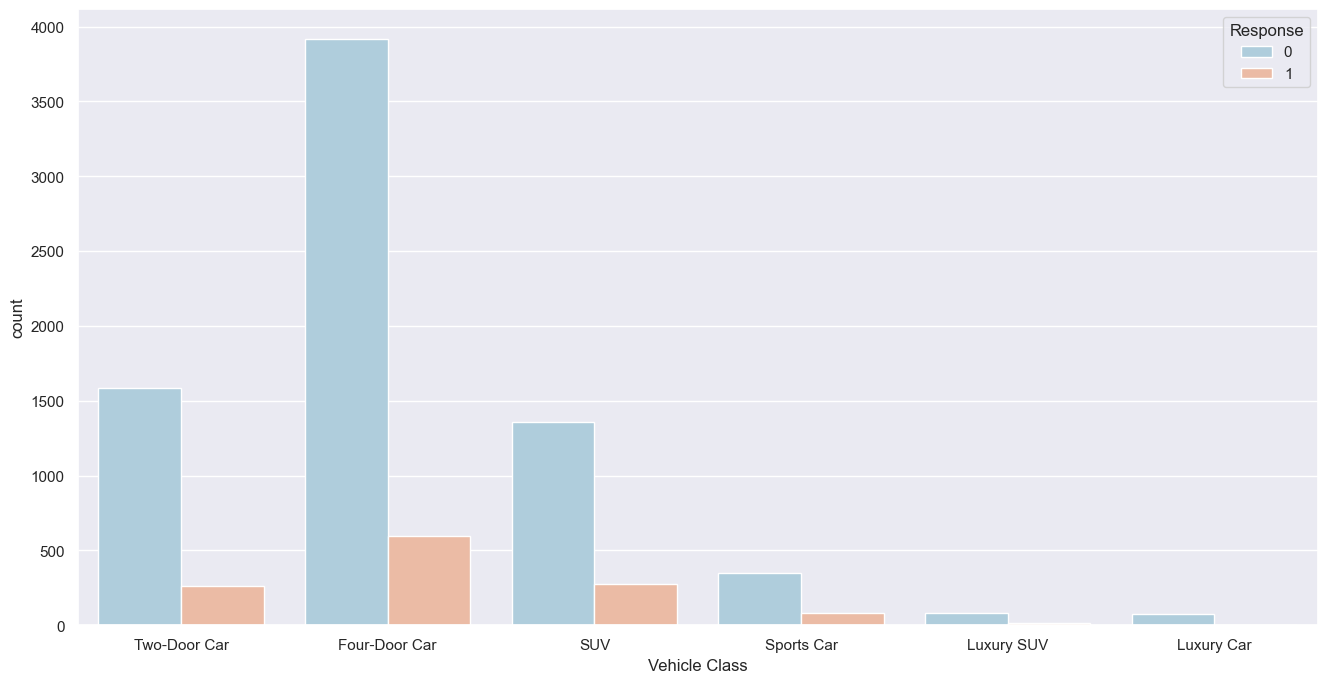

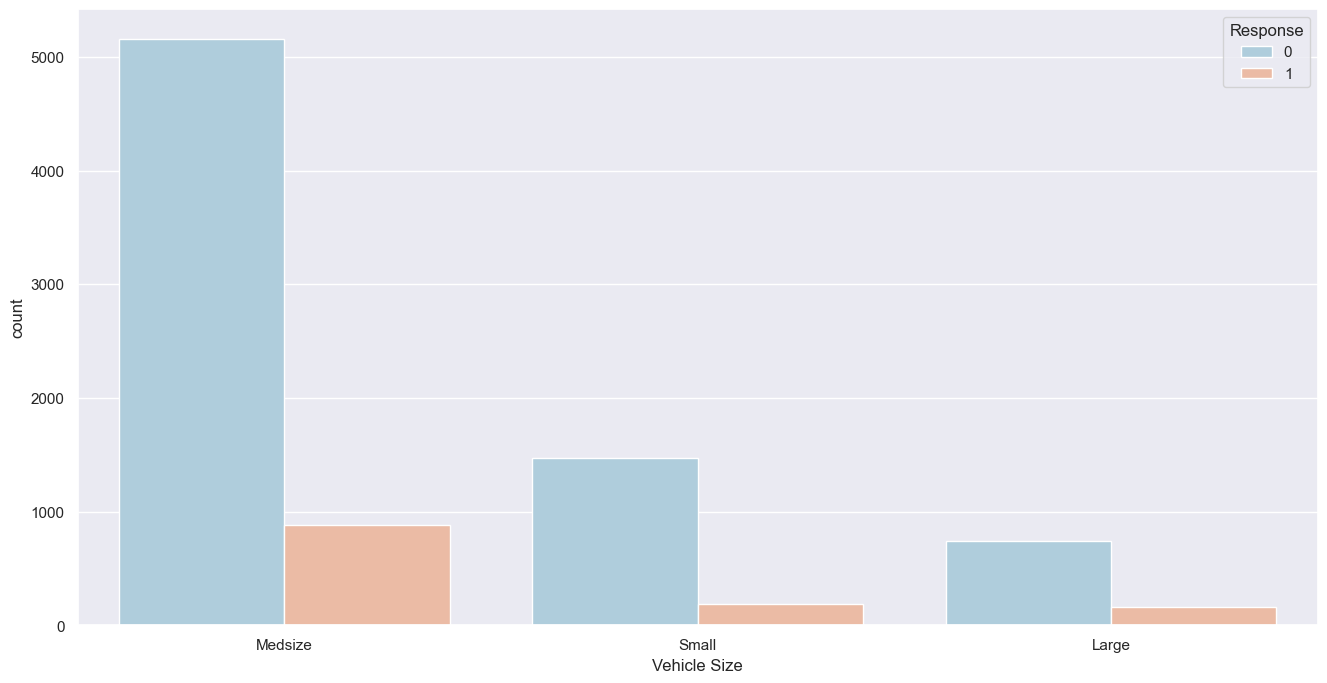

In [31]:
for col in data:
    if data[col].dtype == pd.CategoricalDtype:
        plt.figure(figsize=(16,8))
        sns.countplot(x=col,
                      data=data,
                      hue="Response",
                      palette='RdBu_r')

# Correlations between Features and Target

In order to quantify correlations between the features (variables) and the target, we can calculate the Pearson correlation coefficient. This is a measure of the strength and direction of a linear relationship between two variables: a value of -1 means the two variables are perfectly negatively linearly correlated and a value of +1 means the two variables are perfectly positively linearly correlated. The figure below shows different values of the correlation coeffient and how they appear graphically.

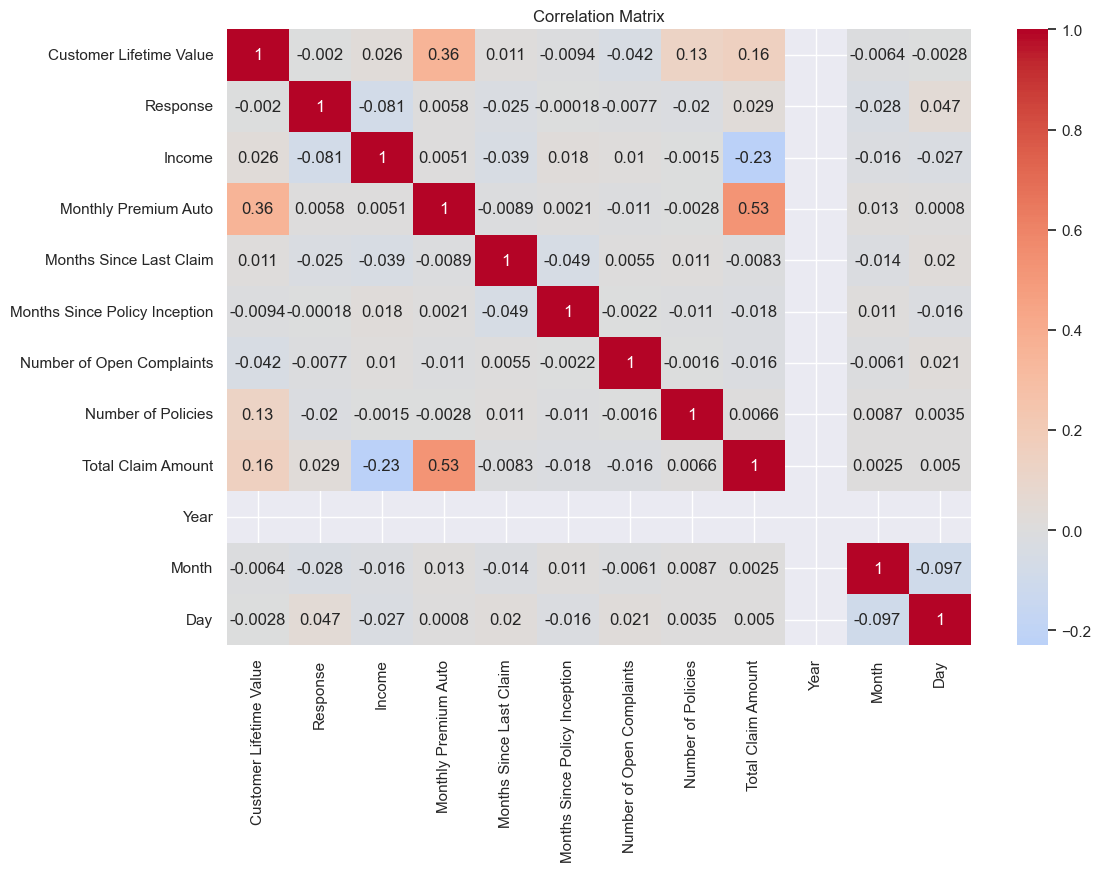

In [32]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_data.corr(method='pearson')  # You can choose 'kendall' or 'spearman' if you prefer

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

In [33]:
data['Pol_bins'] = pd.cut(data['Months Since Policy Inception'], bins = np.linspace(0, 120, num = 4))

In [34]:
data['Gender'] =pd.factorize(data['Gender'] )[0]

In [35]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

dataC = data.copy()
data_cats = _get_categorical_features(data)
# generate binary values using get_dummies
data = pd.get_dummies(data , columns=data_cats )


In [36]:
data['Pol_bins']=pd.factorize(data['Pol_bins'])[0]
data['Income_Anom']=pd.factorize(data['Income_Anom'])[0]


In [37]:
data_labels =data['Response']

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the  data
if 'Response' in data:
    data = data.drop(columns = ['Response'])
else:
    data = data.copy()
    
# Feature names
features = list(data.columns)



# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the  data
imputer.fit(data)

# Transform data
data = imputer.transform(data)

# Repeat with the scaler
scaler.fit(data)
data = scaler.transform(data)

print('Data shape: ', data.shape)

Data shape:  (8600, 67)


In [39]:
# Separate out the features and targets
#features = dum_df.drop(columns='Response')
#targets = pd.DataFrame(dum_df['Response'])


In [40]:

# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6020, 67)
(2580, 67)
(6020,)
(2580,)


In [41]:
lr = LogisticRegression()
rfr = RandomForestClassifier(random_state=23)
dtr = tree.DecisionTreeClassifier()
class_svc = SVC()
xgbr = xgb.XGBClassifier()
lgbmr = lgb.LGBMClassifier()

estimators =[
             ('LogisticRegression',lr),
             ('RandomForestClassifier',rfr),
             ('DecisionTreeClassifier',dtr),
             ('SVC',class_svc),
             ('XGBMClassifier',xgbr),
             ('LGBMClassifier',lgbmr)
]

def model_training(X_train,X_test,y_train,y_test):
    
    for e,r in estimators:
        
        model_names = [e for e,r  in estimators]
        r.fit(X_train,y_train)
        r_preds = r.predict(X_test)
        print("*****************************************************")
        print('ROC_AUC_SCORE for {} is ==> '.format(e),roc_auc_score(y_test,r_preds))
        print('F1_SCORE for {} is ==> '.format(e),f1_score(y_test,r_preds))
        print('RECALL_SCORE for {} is ==> '.format(e),recall_score(y_test,r_preds))
        print("*****************************************************")
        print("\n")

model_training(X_train,X_test,y_train,y_test)        
        

*****************************************************
ROC_AUC_SCORE for LogisticRegression is ==>  0.5769996587603428
F1_SCORE for LogisticRegression is ==>  0.26883910386965376
RECALL_SCORE for LogisticRegression is ==>  0.16136919315403422
*****************************************************


*****************************************************
ROC_AUC_SCORE for RandomForestClassifier is ==>  0.9777648014109077
F1_SCORE for RandomForestClassifier is ==>  0.9762796504369537
RECALL_SCORE for RandomForestClassifier is ==>  0.9559902200488998
*****************************************************


*****************************************************
ROC_AUC_SCORE for DecisionTreeClassifier is ==>  0.9710160270018549
F1_SCORE for DecisionTreeClassifier is ==>  0.8896247240618101
RECALL_SCORE for DecisionTreeClassifier is ==>  0.9853300733496333
*****************************************************


*****************************************************
ROC_AUC_SCORE for SVC is ==>  0.

In [42]:
dot_data = tree.export_graphviz(dtr, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render("dtc-customer-churn") 

'dtc-customer-churn.pdf'

In [43]:
 #Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_roc = roc_auc_score(y_test, model_pred)
    
    # Return the performance metric
    return model_roc

In [44]:

lr_roc = fit_and_evaluate(lr)
print('LogisticRegression Performance : ROC = %0.4f' % lr_roc)


rfr_roc = fit_and_evaluate(rfr)
print('RandomForestClassifier Performance : ROC = %0.4f' % rfr_roc)

dtr_roc = fit_and_evaluate(dtr)
print('DecisionTreeClassifier Performance : ROC = %0.4f' % dtr_roc)

svc_roc = fit_and_evaluate(class_svc)
print('SVC Performance : ROC = %0.4f' % svc_roc)

xgbr_roc = fit_and_evaluate(xgbr)
print('XGBClassifier Performance : ROC = %0.4f' % xgbr_roc)

lgbmr_roc = fit_and_evaluate(lgbmr)
print('LGBMClassifier Performance : ROC = %0.4f' % lgbmr_roc)


LogisticRegression Performance : ROC = 0.5770
RandomForestClassifier Performance : ROC = 0.9778
DecisionTreeClassifier Performance : ROC = 0.9629
SVC Performance : ROC = 0.5865
XGBClassifier Performance : ROC = 0.9970
[LightGBM] [Info] Number of positive: 821, number of negative: 5199
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 6020, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.136379 -> initscore=-1.845698
[LightGBM] [Info] Start training from score -1.845698
LGBMClassifier Performance : ROC = 0.9830


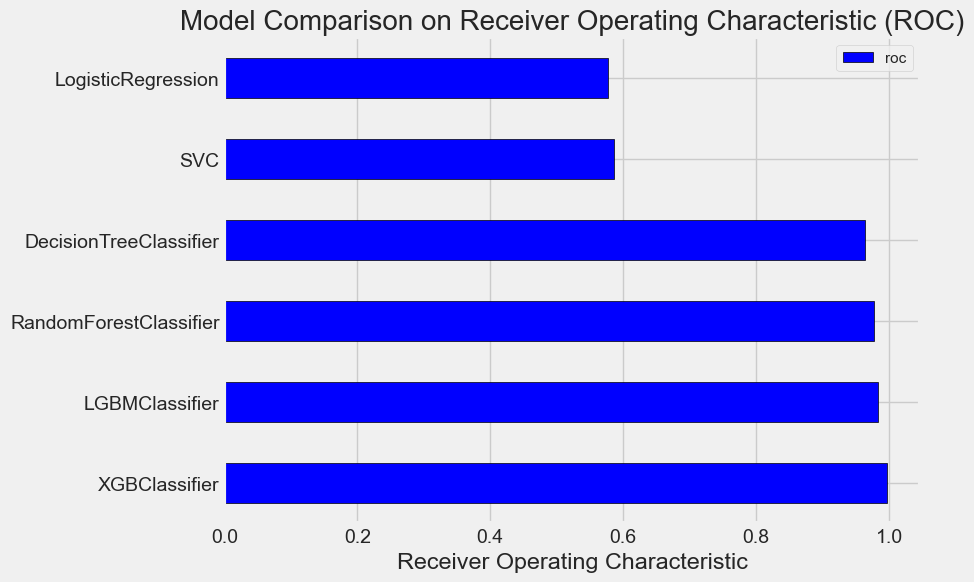

In [45]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['LogisticRegression', 'RandomForestClassifier',
                                           'DecisionTreeClassifier', 'SVC',
                                            'XGBClassifier','LGBMClassifier'],
                                 'roc': [lr_roc, rfr_roc, dtr_roc, 
                                         svc_roc, xgbr_roc,lgbmr_roc]})

# Horizontal bar chart 
model_comparison.sort_values('roc', ascending = False).plot(x = 'model', y = 'roc', kind = 'barh',
                                                           color = 'blue', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Receiver Operating Characteristic'); plt.xticks(size = 14)
plt.title('Model Comparison on Receiver Operating Characteristic (ROC)', size = 20);



*   A number of ensemble /tree algorithms seem to perform well.


*   They might be overfitting .




#Addressing Imbalance on Target Features

In [46]:

# model tuning
#SMOTE
smt = SMOTE(random_state=15)
X_res, y_res = smt.fit_resample(data,data_labels)

In [47]:
# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10318, 67)
(4422, 67)
(10318,)
(4422,)


In [48]:
lr = LogisticRegression()
rfr = RandomForestClassifier(random_state=23)
dtr = tree.DecisionTreeClassifier()
class_svc = SVC()
xgbr = xgb.XGBClassifier()
lgbmr = lgb.LGBMClassifier()

estimators =[
             ('LogisticRegression',lr),
             ('RandomForestClassifier',rfr),
             ('DecisionTreeClassifier',dtr),
             ('SVC',class_svc),
             ('XGBMClassifier',xgbr),
             ('LGBMClassifier',lgbmr)
]

def model_training(X_train,X_test,y_train,y_test):
    
    for e,r in estimators:
        
        model_names = [e for e,r  in estimators]
        r.fit(X_train,y_train)
        r_preds = r.predict(X_test)
        print("*****************************************************")
        print('ROC_AUC_SCORE for {} is ==> '.format(e),roc_auc_score(y_test,r_preds))
        print('F1_SCORE for {} is ==> '.format(e),f1_score(y_test,r_preds))
        print('RECALL_SCORE for {} is ==> '.format(e),recall_score(y_test,r_preds))
        print("*****************************************************")
        print("\n")

model_training(X_train,X_test,y_train,y_test)        
        

*****************************************************
ROC_AUC_SCORE for LogisticRegression is ==>  0.7517064469409964
F1_SCORE for LogisticRegression is ==>  0.75718708536046
RECALL_SCORE for LogisticRegression is ==>  0.7746606334841629
*****************************************************


*****************************************************
ROC_AUC_SCORE for RandomForestClassifier is ==>  0.9787350772831042
F1_SCORE for RandomForestClassifier is ==>  0.9783709157846295
RECALL_SCORE for RandomForestClassifier is ==>  0.9619909502262444
*****************************************************


*****************************************************
ROC_AUC_SCORE for DecisionTreeClassifier is ==>  0.9303580633811461
F1_SCORE for DecisionTreeClassifier is ==>  0.9317980513728964
RECALL_SCORE for DecisionTreeClassifier is ==>  0.9520361990950226
*****************************************************


*****************************************************
ROC_AUC_SCORE for SVC is ==>  0.9613

In [49]:

lr_roc = fit_and_evaluate(lr)
print('LogisticRegression Performance : ROC = %0.4f' % lr_roc)


rfr_roc = fit_and_evaluate(rfr)
print('RandomForestClassifier Performance : ROC = %0.4f' % rfr_roc)

dtr_roc = fit_and_evaluate(dtr)
print('DecisionTreeClassifier Performance : ROC = %0.4f' % dtr_roc)

svc_roc = fit_and_evaluate(class_svc)
print('SVC Performance : ROC = %0.4f' % svc_roc)

xgbr_roc = fit_and_evaluate(xgbr)
print('XGBClassifier Performance : ROC = %0.4f' % xgbr_roc)

lgbmr_roc = fit_and_evaluate(lgbmr)
print('LGBMClassifier Performance : ROC = %0.4f' % lgbmr_roc)


LogisticRegression Performance : ROC = 0.7517
RandomForestClassifier Performance : ROC = 0.9787
DecisionTreeClassifier Performance : ROC = 0.9319
SVC Performance : ROC = 0.9613
XGBClassifier Performance : ROC = 0.9957
[LightGBM] [Info] Number of positive: 5160, number of negative: 5158
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6418
[LightGBM] [Info] Number of data points in the train set: 10318, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500097 -> initscore=0.000388
[LightGBM] [Info] Start training from score 0.000388
LGBMClassifier Performance : ROC = 0.9919


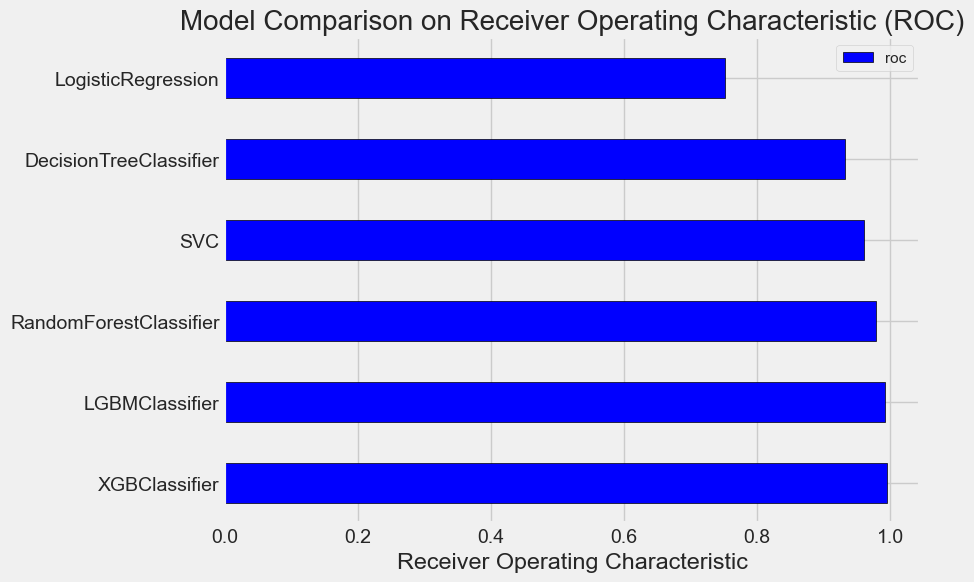

In [50]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['LogisticRegression', 'RandomForestClassifier',
                                           'DecisionTreeClassifier', 'SVC',
                                            'XGBClassifier','LGBMClassifier'],
                                 'roc': [lr_roc, rfr_roc, dtr_roc, 
                                         svc_roc, xgbr_roc,lgbmr_roc]})

# Horizontal bar chart 
model_comparison.sort_values('roc', ascending = False).plot(x = 'model', y = 'roc', kind = 'barh',
                                                           color = 'blue', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Receiver Operating Characteristic'); plt.xticks(size = 14)
plt.title('Model Comparison on Receiver Operating Characteristic (ROC)', size = 20);

#Feature Importances

**Random Forest Classifier**

<Axes: >

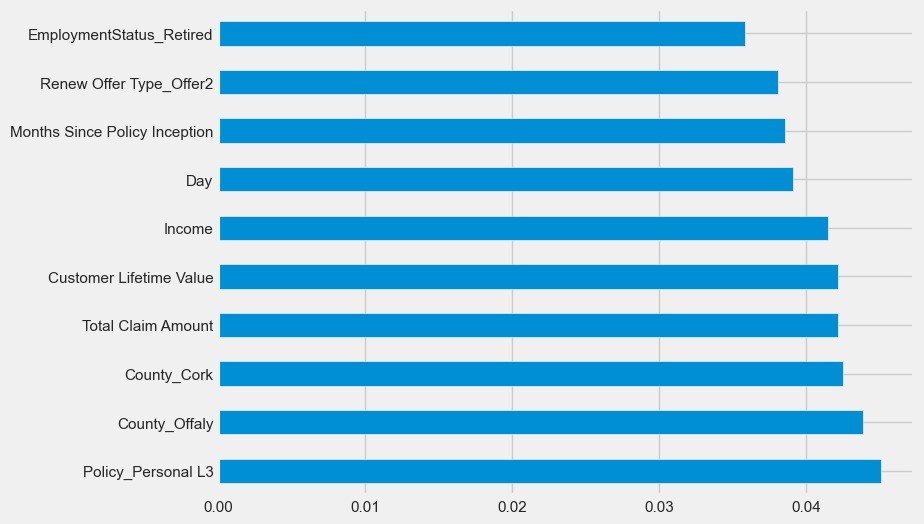

In [51]:
feat_importances = pd.Series(rfr.feature_importances_, index=features)
feat_importances.nlargest(10).plot(kind='barh')

**LightGBMClassifier**

<Axes: >

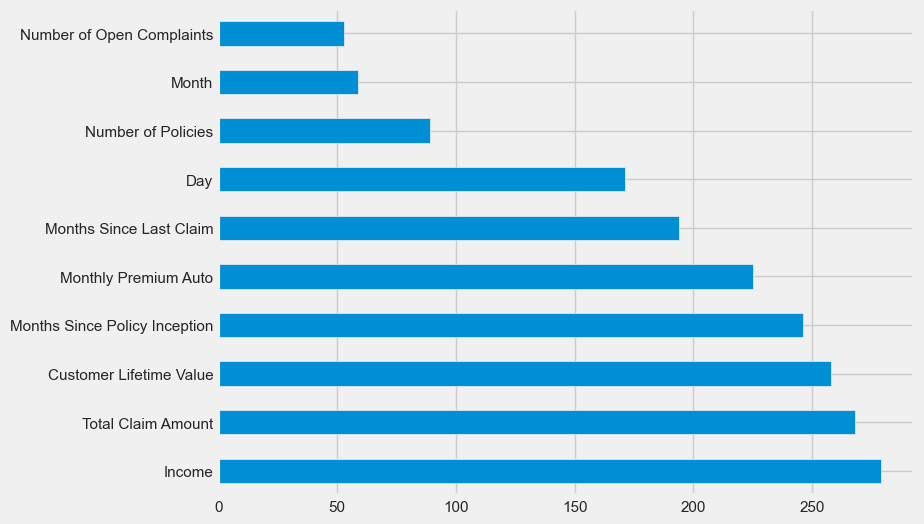

In [52]:
feat_importances = pd.Series(lgbmr.feature_importances_, index=features)
feat_importances.nlargest(10).plot(kind='barh')

**Decision Tree Classifier**

<Axes: >

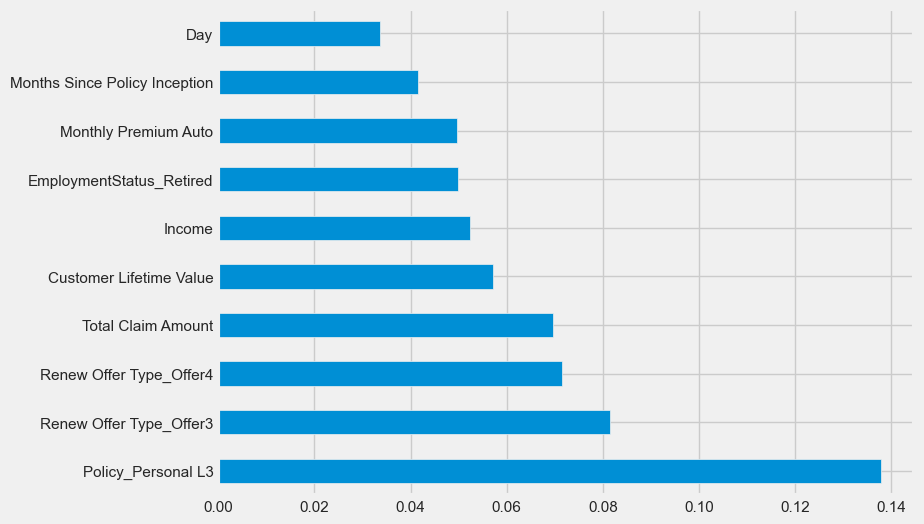

In [53]:
feat_importances = pd.Series(dtr.feature_importances_, index=features)
feat_importances.nlargest(10).plot(kind='barh')

**XGBoost Classifier**

<Axes: >

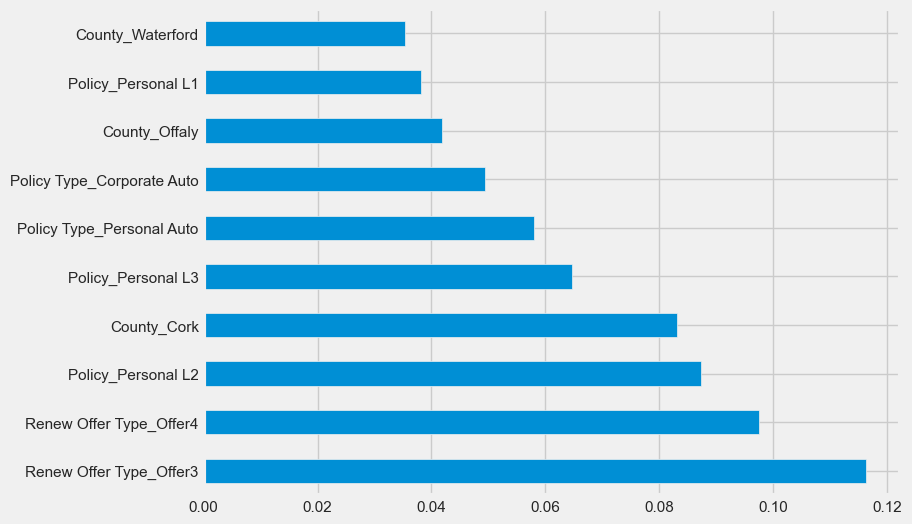

In [54]:
feat_importances = pd.Series(xgbr.feature_importances_, index=features)
feat_importances.nlargest(10).plot(kind='barh')

In [55]:
import pickle
#save the lightgbmmodel 
pickle.dump(lgbmr, open("lgbmr_model.sav", "wb"))
pickle.dump(xgbr, open("xgbr_model.sav", "wb"))
pickle.dump(dtr, open("dtr_model.sav", "wb"))
pickle.dump(rfr, open("rfr_model.sav", "wb"))
pickle.dump(class_svc, open("svc_model.sav", "wb"))